In [2]:
import os
import glob
try :
    import pandas as pd 
except : 
    !pip install pandas
    import pandas as pd
import numpy as np
#import plotnine as p9
try :
    import matplotlib.pyplot as plt
except :
    !pip install matplotlib
    import matplotlib.pyplot as plt

try :
    import seaborn as sns
except : 
    !pip install seaborn
    import seaborn as sns
try :
    import nibabel as nib
except : 
    !pip install nibabel
    import nibabel as nib

try :
    from skimage.util import montage 
except :
    !pip install scikit-image
    from skimage.util import montage 
from skimage.transform import rotate
try : 
    import openxyl
except : 
    ! pip install openpyxl
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
#%matplotlib notebook
try :
    from nilearn import surface, datasets, plotting
    import nilearn
except : 
    !pip install nilearn
    from nilearn import surface, datasets, plotting
    import nilearn    
from brainstat.datasets import fetch_mask, fetch_template_surface,fetch_parcellation
from brainspace.mesh.mesh_io import read_surface
from brainspace.plotting import plot_hemispheres
from IPython.display import display,Image
from scipy.stats import zscore
import scipy.special


ModuleNotFoundError: No module named 'brainstat'

In [2]:
STUDY_PATH=os.path.join("/NAS","dumbo","protocoles","FAIRPARKII")
SCRIPT_PATH=os.path.join(STUDY_PATH,'scripts')
LOG_PATH=os.path.join(SCRIPT_PATH,'log')
#CQ_FILE=os.path.join(STUDY_PATH,'FairparkII_MRIData_20210622.xlsx')
CQ_FILE=os.path.join(STUDY_PATH,'FairparkII_MRIData_20210817.xlsx')

In [3]:
RES_FILE=os.path.join(STUDY_PATH,"resT2Struct.csv")
val = pd.read_csv(RES_FILE,index_col=0)
RES_FILE=os.path.join(STUDY_PATH,"resT2Struct_W00.csv")
val_W00 = pd.read_csv(RES_FILE,index_col=0)
RES_FILE=os.path.join(STUDY_PATH,"resT2Struct_W36.csv")
val_W36 = pd.read_csv(RES_FILE,index_col=0)

In [4]:
df_roi = pd.read_csv(os.path.join(STUDY_PATH,'Coord_ROI_atlas_inMNI.csv'))
#df_roi = df_roi.drop('Name_inFP2', axis=1)
df_roi.set_index('Name_inFP2', inplace=True)
df_roi[df_roi['RoroChoice']==1].iloc[:,0:3]

X          Y          Z
Name_inFP2                                                              
Right accumbens                           9.388525  12.688525  -7.250820
Left accumbens                           -9.303387  11.960236  -7.449190
Left amygdala                            22.286025  -4.068067 -19.733526
Right amygdala                          -21.742625  -5.337021 -19.808260
Right caudate                            13.781250  10.302004   9.587786
Left caudate                            -12.909930   9.549651   9.286178
Right hippocampus                        26.481760 -21.424464 -13.697425
Left hippocampus                        -24.975064 -22.901548 -13.741617
Right pallidum                           20.209500  -2.362500  -2.030000
Left pallidum                           -19.372294  -3.380471  -2.081289
Right putamen                            25.881330   2.194801   0.054018
Left putamen                            -25.193927   0.724375   0.188727
Right thalamus                           11.860559 -17.959282   5.417171
Left thalamus                           -11.206180 -19.134177   5.353869
Right anterior insula                    36.822819  11.966779  -2.324497
Left anterior insula                    -35.389674  10.764575  -2.156791
Right cuneus                              9.472509 -78.154629  24.550813
Left cuneus                              -5.953444 -81.449862  21.351928
Right postcentral gyrus medial segment    8.473389 -40.042017  63.904762
Left postcentral gyrus medial segment    -8.169266 -41.949162  63.485269
Right precentral gyrus medial segment     6.456253 -25.169005  55.441601
Left precentral gyrus medial segment     -6.045762 -26.120175  55.012933
Right sup. frontal gyrus medial segment   5.868920  46.075108  22.130681
Left sup. frontal gyrus medial segment   -4.631939  44.327950  28.258637
Right posterior cingulate gyrus           7.442642 -41.674137  24.222648
Left posterior cingulate gyrus           -6.217737 -42.333912  24.767506
Right precuneus                           9.269851 -58.945146  39.622091
Left precuneus                           -7.466016 -60.541963  37.911022
Right parahippocampal gyrus              23.522534 -20.554582 -23.726340
Left parahippocampal gyrus              -21.759709 -22.832841 -22.770838
Right posterior insula                   39.120089  -9.706325   2.046810
Left posterior insula                   -38.164329 -11.889329   2.025915
Right postcentral gyrus                  40.993143 -23.463374  52.103757
Left postcentral gyrus                  -39.767292 -27.158630  52.312786
Right precentral gyrus                   40.773023  -6.440686  46.997745
Left precentral gyrus                   -39.165601  -8.622654  47.792741
Right supplementary motor cortex          5.645116   5.262797  52.685507
Left supplementary motor cortex          -4.787291   5.015644  51.597017
Right supramarginal gyrus                56.871672 -33.389069  37.162347
Left supramarginal gyrus                -55.315523 -38.468746  37.154955
Left_Dentate                            -14.415076 -59.396965 -35.052863
Right_Dentate                            16.438810 -59.408094 -35.022428
Right RN                                  5.530688 -20.024462  -8.203447
Left Gpi                                -17.831379  -8.206164  -2.709391
Left Gpe                                -19.206820  -4.747612   0.032922
Right STR                                19.239049   4.845743   4.477829
Right Gpi                                18.506173  -7.059579  -2.530452
Right SN                                 10.426786 -16.793945 -11.652783
Left RN                                  -4.321009 -20.294465  -8.120523
Left SN                                  -9.360342 -17.024617 -11.796926
Right Sth                                10.820730 -13.124564  -6.198184
Left Sth                                -10.127392 -14.313306  -6.263174
Right Gpe                                19.790497  -3.364154   0.096141
Left STR                          

In [5]:
def getCQT1AndMultiTE(ptID):
    retT1=-1;retT2=-1
    CQData = pd.read_excel(CQ_FILE,index_col=0,engine='openpyxl')
    if ptID in CQData.index :
        if not np.isnan(CQData['QC_3DT1'][ptID]) : retT1=CQData['QC_3DT1'][ptID]
        if not np.isnan(CQData['QC_3DMULTI'][ptID]) : retT2=CQData['QC_3DMULTI'][ptID]
    return retT1,retT2 

In [6]:
CQData = pd.read_excel(CQ_FILE,index_col=0,engine='openpyxl')

In [7]:
glasser = fetch_parcellation("fsaverage5", "glasser", 360)
pial_left, pial_right = fetch_template_surface("fsaverage5",layer="pial",join=False)
inflated_left, inflated_right = fetch_template_surface("fsaverage5",layer="inflated",join=False)
pial_combined = fetch_template_surface("fsaverage5", join=True)
pial_combined_fslr32k = fetch_template_surface("fslr32k", join=True)
pial_left_fslr32k, pial_right_fslr32k = fetch_template_surface("fslr32k", join=False)
inflated_left_fslr32k,inflated_right_fslr32k = fetch_template_surface("fslr32k",layer="inflated", join=False)
mask = fetch_mask("fsaverage5")

In [8]:
df_W00=CQData.query("SUBJ.str.endswith('W00')")
df_W00.index=df_W00.index.str[:-8]
df_W36=CQData.query("SUBJ.str.endswith('W36')")
df_W36.index=df_W36.index.str[:-8]
df_CQ_FULL = pd.concat([df_W00.add_suffix('_W00'), df_W36.add_suffix('_W36')], axis=1)

In [9]:
df_CQ_FULL["GROUP"] = pd.NaT
GROUP_FILE=os.path.join(STUDY_PATH,"Group_FAIRPARK_CORR.xlsx")
GroupData = pd.read_excel(GROUP_FILE,index_col=0,engine='openpyxl')
GroupData.index=GroupData.index.astype(str)
for SUBJ in df_CQ_FULL.index:
    ptID=SUBJ[0]+SUBJ[2:6]   
    GRP=""
    if ptID in GroupData.index :
        if not np.isnan(GroupData['GROUPE_1_Deferiprone'][ptID]) :           
            df_CQ_FULL['GROUP'][SUBJ]=GroupData['GROUPE_1_Deferiprone'][ptID]
                
print(df_CQ_FULL)

          QC_3DT1_W00  QC_3DMULTI_W00  RV_CQ_ORIENTATION_W00  QC_3DT1_W36  \
SUBJ                                                                        
101001YM          3.0             4.0                    NaN          4.0   
101002GX          3.0             0.0                    NaN          3.0   
101003DM          4.0             4.0                    NaN          4.0   
101004NW          4.0             4.0                    NaN          4.0   
101005CT          4.0             4.0                    NaN          4.0   
...               ...             ...                    ...          ...   
703011AA          4.0             4.0                    NaN          4.0   
703012AA          4.0             4.0                    NaN         -1.0   
703013AA          4.0             4.0                    NaN          4.0   
101011VC          NaN             NaN                    NaN          4.0   
104003MA          NaN             NaN                    NaN          3.0   

/tmp/ipykernel_6582/1183194703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CQ_FULL['GROUP'][SUBJ]=GroupData['GROUPE_1_Deferiprone'][ptID]
/tmp/ipykernel_6582/1183194703.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_CQ_FULL['GROUP'][SUBJ]=GroupData['GROUPE_1_Deferiprone'][ptID]


# Surface mapping facon nilearn

In [10]:
nilearn.datasets.fetch_surf_fsaverage()

{'area_left': '/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nilearn/datasets/data/fsaverage5/area_left.gii.gz',
 'area_right': '/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nilearn/datasets/data/fsaverage5/area_right.gii.gz',
 'curv_left': '/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nilearn/datasets/data/fsaverage5/curv_left.gii.gz',
 'curv_right': '/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nilearn/datasets/data/fsaverage5/curv_right.gii.gz',
 'flat_left': '/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nilearn/datasets/data/fsaverage5/flat_left.gii.gz',
 'flat_right': '/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nilearn/datasets/data/fsaverage5/flat_right.gii.gz',
 'infl_left': '/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nilearn/datasets/data/fsaverage5/infl_left.gii.gz',
 'infl_right': '/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/nilearn/datasets/data/fsavera

In [11]:
#mylistFile=glob.glob(os.path.join(STUDY_PATH,'T2Maps','*R2*sub-*ses-W00_mni.nii.gz'))
#mylistFile.sort(key=lambda fichier: fichier.lower())
fsaverage_nii = nilearn.datasets.fetch_surf_fsaverage()
valR2_W00_PLA=[]
valR2_W36_PLA=[]
valR2_W00_DEF=[]
valR2_W36_DEF=[]
liste_PLA=[]
liste_DEF=[]
df_4test = df_CQ_FULL.query("(QC_3DT1_W00 > 1) & (QC_3DMULTI_W00 > 2) & (QC_3DT1_W36 > 1) & (QC_3DMULTI_W00 > 2) ")
df_4test['GROUP'] = df_4test['GROUP'].replace({1: 'DEF', 2: 'PLA'})
for SUBJ in df_4test.index :
    #print(SUBJ)
    #SUBJ=file.split('/')[6].split("_")[2]
    file_W00=os.path.join(STUDY_PATH,'T2Maps',f'rRAS_R2Map_sub-{SUBJ}_ses-W00_mni.nii.gz')
    file_W36=os.path.join(STUDY_PATH,'T2Maps',f'rRAS_R2Map_sub-{SUBJ}_ses-W36_mni.nii.gz')
    if os.path.exists(file_W00) & os.path.exists(file_W36):
            
        img = nib.load(file_W00)
        texture_right = surface.vol_to_surf(img,fsaverage_nii.pial_right)
        texture_left  = surface.vol_to_surf(img,fsaverage_nii.pial_left)
        volOnSurface_W00 = np.concatenate([texture_left,texture_right], axis=0)

        img = nib.load(file_W36)
        texture_right = surface.vol_to_surf(img,fsaverage_nii.pial_right)
        texture_left  = surface.vol_to_surf(img,fsaverage_nii.pial_left)
        volOnSurface_W36 = np.concatenate([texture_left,texture_right], axis=0)
            
        if df_4test.loc[SUBJ,'GROUP'] == "DEF" :
            valR2_W00_DEF.append(volOnSurface_W00)  
            valR2_W36_DEF.append(volOnSurface_W36)
            liste_DEF.append(SUBJ)
        else :
            valR2_W00_PLA.append(volOnSurface_W00)  
            valR2_W36_PLA.append(volOnSurface_W36)
            liste_PLA.append(SUBJ)
    else :
        print("eliminated")
        df_4test=df_4test.drop(SUBJ)


/tmp/ipykernel_6582/553723697.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4test['GROUP'] = df_4test['GROUP'].replace({1: 'DEF', 2: 'PLA'})


eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated


eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated
eliminated


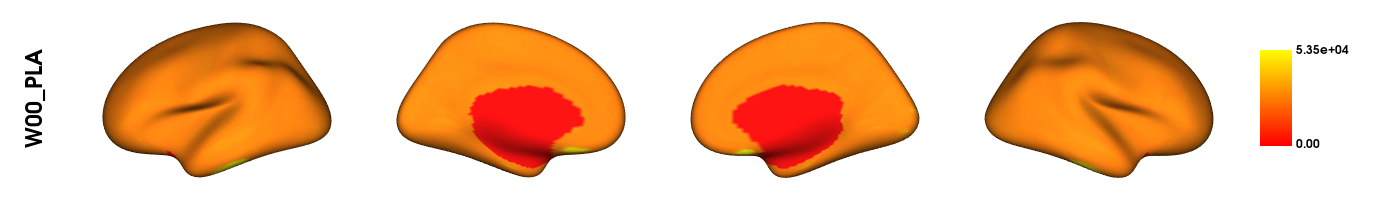

In [12]:
#mylistFile=glob.glob(os.path.join(STUDY_PATH,'T2Maps','*R2*sub-*ses-W00_mni.nii.gz'))
#mylistFile.sort(key=lambda fichier: fichier.lower())
fsaverage_nii = nilearn.datasets.fetch_surf_fsaverage()
valR2_W00_PLA_w=[]
valR2_W36_PLA_w=[]
valR2_W00_DEF_w=[]
valR2_W36_DEF_w=[]

df_4test = df_CQ_FULL.query("(QC_3DT1_W00 > 1) & (QC_3DMULTI_W00 > 2) & (QC_3DT1_W36 > 1) & (QC_3DMULTI_W00 > 2) ")
for SUBJ in df_4test.index :
    #print(SUBJ)
    #SUBJ=file.split('/')[6].split("_")[2]
    file_W00=os.path.join(STUDY_PATH,'T2Maps',f'rRAS_R2Map_sub-{SUBJ}_ses-W00_mni.nii.gz')
    file_W36=os.path.join(STUDY_PATH,'T2Maps',f'rRAS_R2Map_sub-{SUBJ}_ses-W36_mni.nii.gz')
    if os.path.exists(file_W00) & os.path.exists(file_W36):
            
        img = nib.load(file_W00)
        texture_right = surface.vol_to_surf(img,fsaverage_nii.white_right)
        texture_left  = surface.vol_to_surf(img,fsaverage_nii.white_left)
        volOnSurface_W00 = np.concatenate([texture_left,texture_right], axis=0)

        img = nib.load(file_W36)
        texture_right = surface.vol_to_surf(img,fsaverage_nii.white_right)
        texture_left  = surface.vol_to_surf(img,fsaverage_nii.white_left)
        volOnSurface_W36 = np.concatenate([texture_left,texture_right], axis=0)
            
        if df_CQ_FULL.loc[SUBJ,'GROUP'] == 1 :
            valR2_W00_DEF_w.append(volOnSurface_W00*1000)  
            valR2_W36_DEF_w.append(volOnSurface_W36*1000)
            
        else :
            valR2_W00_PLA_w.append(volOnSurface_W00*1000)  
            valR2_W36_PLA_w.append(volOnSurface_W36*1000)
    else :
        print("eliminated")
        df_4test=df_4test.drop(SUBJ)

tmp=np.array(valR2_W00_DEF_w)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_d=np.median(tmp_c,axis=0)
#tmp_d=np.clip(np.mean(tmp_z,axis=0),-0.5,0.5)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_nilearn_W00_PLA.png")
plot_hemispheres(inflated_left,inflated_right,(tmp_d*1000)*mask,color_bar=True,
    label_text=["W00_PLA"], cmap="autumn", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12}, 
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))


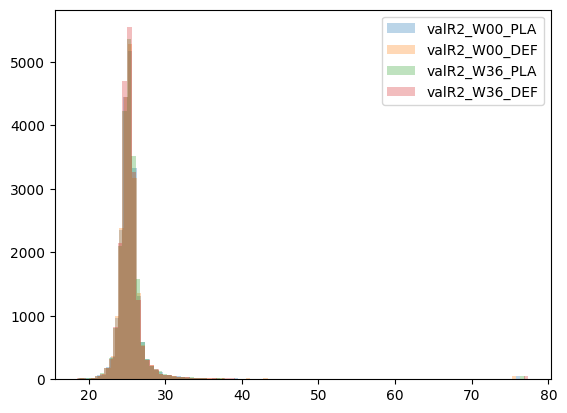

In [13]:
fig, ax = plt.subplots()

tmp=np.array(valR2_W00_PLA)
tmp_c=np.clip(tmp,np.quantile(tmp,0),np.quantile(tmp,0.99))
#tmp_z=zscore(tmp_c,axis=0)
tmp_d=np.median(tmp_c,axis=0)
ax.hist((1000*tmp_d).ravel(),bins=100, alpha=0.3, label='valR2_W00_PLA')

tmp=np.array(valR2_W00_DEF)
tmp_c=np.clip(tmp,np.quantile(tmp,0),np.quantile(tmp,0.99))
#tmp_z=zscore(tmp_c,axis=0)
tmp_d=np.median(tmp_c,axis=0)
ax.hist((1000*tmp_d).ravel(),bins=100, alpha=0.3, label='valR2_W00_DEF')

tmp=np.array(valR2_W36_PLA)
tmp_c=np.clip(tmp,np.quantile(tmp,0),np.quantile(tmp,0.99))
#tmp_z=zscore(tmp_c,axis=0)
tmp_d=np.median(tmp_c,axis=0)
ax.hist((1000*tmp_d).ravel(),bins=100, alpha=0.3, label='valR2_W36_PLA')

tmp=np.array(valR2_W36_DEF)
tmp_c=np.clip(tmp,np.quantile(tmp,0),np.quantile(tmp,0.99))
#tmp_z=zscore(tmp_c,axis=0)
tmp_d=np.median(tmp_c,axis=0)
ax.hist((1000*tmp_d).ravel(),bins=100, alpha=0.3, label='valR2_W36_DEF')
# Ajouter une légende
ax.legend()

plt.savefig(os.path.join(STUDY_PATH,"screenshots",f"distrib_non_norm.jpg"))

# Afficher le graphique
plt.show()

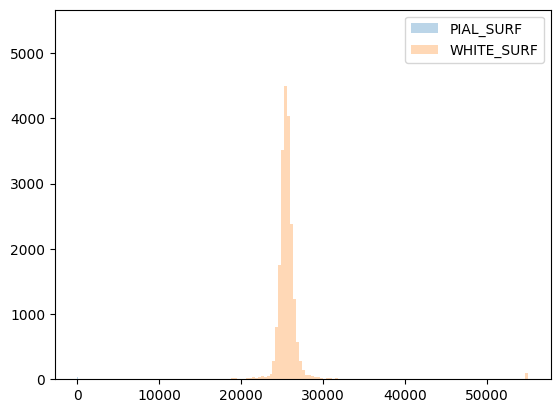

In [14]:
fig, ax = plt.subplots()

FULL_R2cort=np.vstack([np.array(valR2_W00_PLA),np.array(valR2_W36_PLA),np.array(valR2_W00_DEF),np.array(valR2_W36_DEF)])
tmp_c=np.clip(FULL_R2cort,np.quantile(FULL_R2cort,0),np.quantile(FULL_R2cort,0.99))
#tmp_z=zscore(tmp_c,axis=0)
tmp_d=np.median(tmp_c,axis=0)
ax.hist((1000*tmp_d).ravel(),bins=100, alpha=0.3, label='PIAL_SURF')
# Ajouter une légende
ax.legend()

FULL_R2cort=np.vstack([np.array(valR2_W00_PLA_w),np.array(valR2_W36_PLA_w),np.array(valR2_W00_DEF_w),np.array(valR2_W36_DEF_w)])
tmp_c=np.clip(FULL_R2cort,np.quantile(FULL_R2cort,0),np.quantile(FULL_R2cort,0.99))
#tmp_z=zscore(tmp_c,axis=0)
tmp_d=np.median(tmp_c,axis=0)
ax.hist((1000*tmp_d).ravel(),bins=100, alpha=0.3, label='WHITE_SURF')
# Ajouter une légende
ax.legend()

# Afficher le graphique
plt.show()

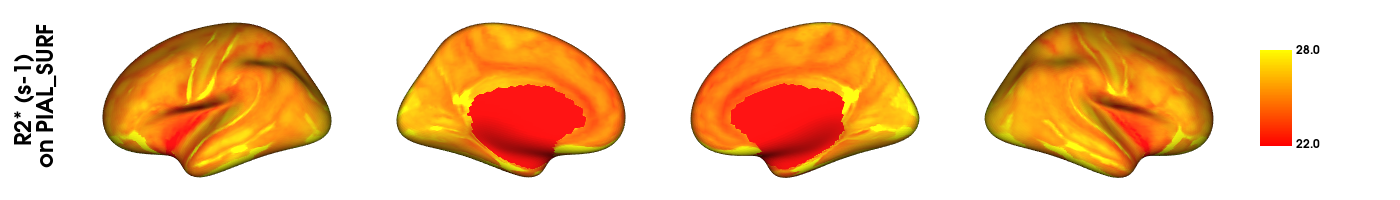

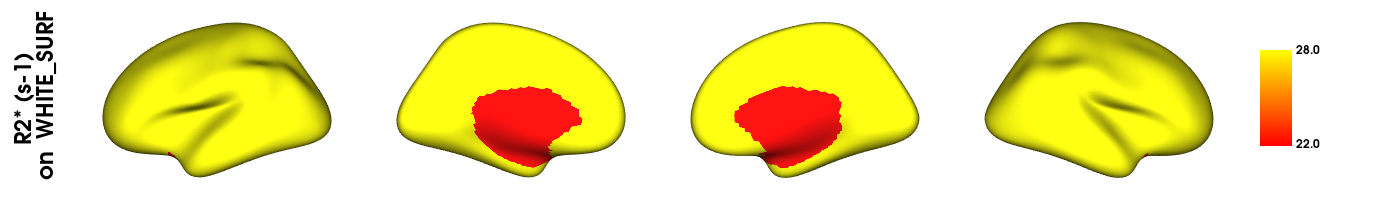

In [15]:
FULL_R2cort=np.vstack([np.array(valR2_W00_PLA),np.array(valR2_W36_PLA),np.array(valR2_W00_DEF),np.array(valR2_W36_DEF)])
#PIAL
tmp_c=np.clip(FULL_R2cort,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_d=np.median(tmp_c,axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_nilearn_W00_PLA.png")
plot_hemispheres(inflated_left,inflated_right,(1000*tmp_d)*mask, color_bar=True,
    label_text=["R2* (s-1)\n on PIAL_SURF"], cmap="autumn", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12},color_range=(22,28), 
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))

#WHITE
FULL_R2cort=np.vstack([np.array(valR2_W00_PLA_w),np.array(valR2_W36_PLA_w),np.array(valR2_W00_DEF_w),np.array(valR2_W36_DEF_w)])
tmp=np.array(valR2_W00_PLA_w)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_d=np.median(tmp_c,axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_nilearn_W00_PLA.png")
plot_hemispheres(inflated_left,inflated_right,(1000*tmp_d)*mask, color_bar=True,
    label_text=["R2* (s-1)\n on  WHITE_SURF"], cmap="autumn", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12},color_range=(22,28), 
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))



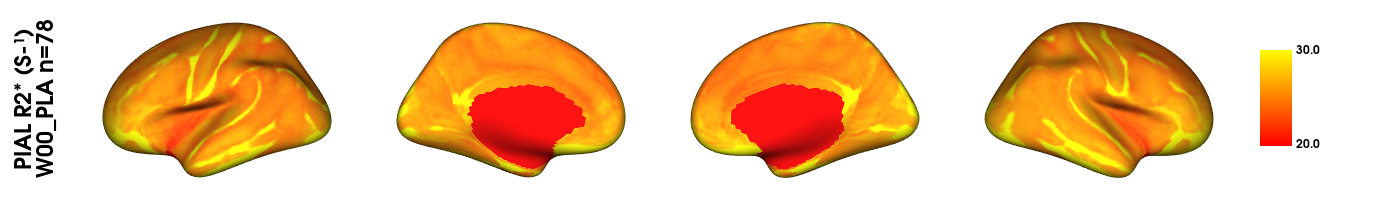

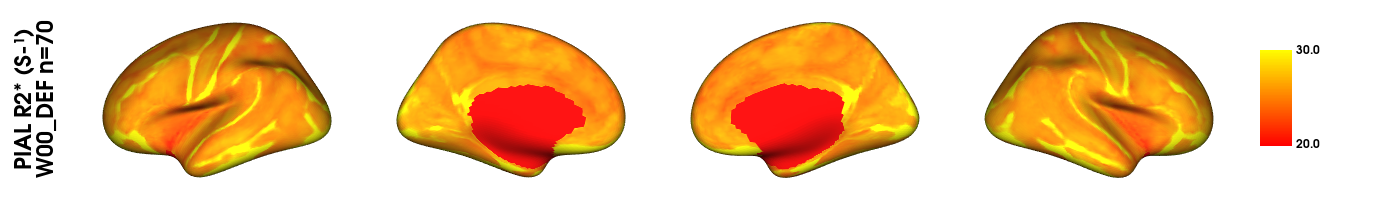

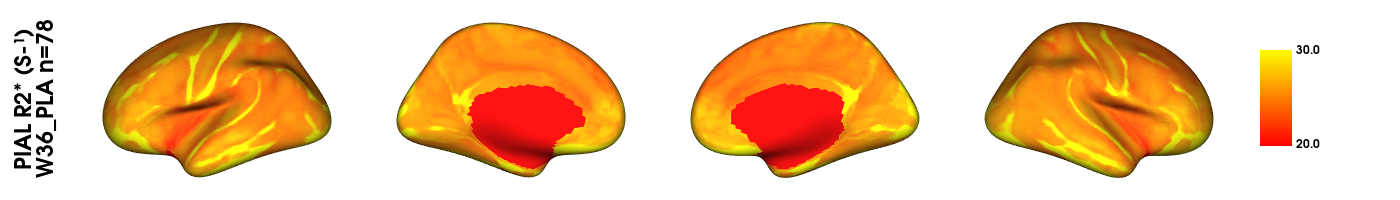

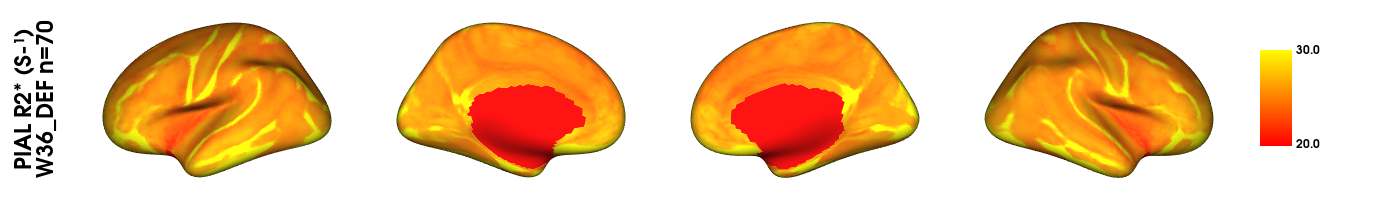

In [49]:
exposant_minus_1 = "⁻-¹"

tmp=np.array(valR2_W00_PLA)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
#tmp_z=zscore(tmp_c,axis=1)
tmp_d=np.mean(tmp_c,axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_nilearn_W00_PLA.png")
plot_hemispheres(inflated_left,inflated_right,(1000*tmp_d)*mask, color_bar=True,
    label_text=[f"PIAL R2* (S{exposant_minus_1})\nW00_PLA n={len(valR2_W00_PLA)}"], cmap="autumn", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12},color_range=(20,30), 
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))

tmp=np.array(valR2_W00_DEF)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
#tmp_z=zscore(tmp_c,axis=1)
tmp_d=np.mean(tmp_c,axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_nilearn_W00_DEF.png")
plot_hemispheres(inflated_left,inflated_right,(1000*tmp_d)*mask, color_bar=True,
    label_text=[f"PIAL R2* (S{exposant_minus_1})\nW00_DEF n={len(valR2_W00_DEF)}"], cmap="autumn", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12},color_range=(20,30),  
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))

tmp=np.array(valR2_W36_PLA)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
#tmp_z=zscore(tmp_c,axis=1)
tmp_d=np.mean(tmp_c,axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_nilearn_W36_PLA.png")
plot_hemispheres(inflated_left,inflated_right,(1000*tmp_d)*mask, color_bar=True,
    label_text=[f"PIAL R2* (S{exposant_minus_1})\nW36_PLA n={len(valR2_W36_PLA)}"], cmap="autumn", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12},color_range=(20,30),  
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))

tmp=np.array(valR2_W36_DEF)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
#tmp_z=zscore(tmp_c,axis=1)
tmp_d=np.mean(tmp_c,axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_nilearn_W36_DEF.png")
plot_hemispheres(inflated_left,inflated_right,(1000*tmp_d)*mask, color_bar=True,
    label_text=[f"PIAL R2* (S{exposant_minus_1})\nW36_DEF n={len(valR2_W36_DEF)}"], cmap="autumn", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12},color_range=(20,30),  
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))

In [17]:
    #data = img    
    #data_lh = nib.gifti.GiftiImage()
    #data_lh.add_gifti_data_array(nib.gifti.gifti.GiftiDataArray(data=data[:len(data)]))
    
    #data_rh = nib.gifti.GiftiImage()
    
    #r_filename_func = f"/NAS/tupac/protocoles/PULSE/MNI152/Projections/sub-{row[0]}_right_projection.func.gii"
    #l_filename_func = f"/NAS/tupac/protocoles/PULSE/MNI152/Projections/sub-{row[0]}_left_projection.func.gii"
    
    #nib.save(surface_gifti_right,r_filename_func)
    #nib.save(surface_gifti_left, l_filename_func)
    #print(f"{row[0]} sauvegardé")

    #plotting.plot_surf_stat_map(fsaverage["pial_right"], texture_right, hemi="right", vmin = 0, vmax = 100)
    #plotting.plot_surf_stat_map(fsaverage["pial_left"], texture_left, hemi = "left", vmin = 0, vmax = 100)
    #plotting.show()

# Surface Mapping facon wb

In [18]:
valR2_W00_PLA_2=[]
valR2_W36_PLA_2=[]
valR2_W00_DEF_2=[]
valR2_W36_DEF_2=[]
df_4test_2 = df_CQ_FULL.query("(QC_3DT1_W00 > 1) & (QC_3DMULTI_W00 > 3) & (QC_3DT1_W36 > 1) & (QC_3DMULTI_W00 > 3) ")
for SUBJ in df_4test.index :
    #SUBJ=file.split('/')[6].split("_")[2]   
    #file_W00=os.path.join(STUDY_PATH,'SurfaceMapping',f'sub-{SUBJ}_ses-W00',f'R2_sub-{SUBJ}_ses-W00.merged.dscalar.nii')
    #file_W36=os.path.join(STUDY_PATH,'SurfaceMapping',f'sub-{SUBJ}_ses-W36',f'R2_sub-{SUBJ}_ses-W36.merged.dscalar.nii')
    file_W00_L=os.path.join(STUDY_PATH,'SurfaceMapping',f'sub-{SUBJ}_ses-W00',f'R2.L.32k_fs_LR.shape.gii')
    file_W00_R=os.path.join(STUDY_PATH,'SurfaceMapping',f'sub-{SUBJ}_ses-W00',f'R2.R.32k_fs_LR.shape.gii')
    file_W36_L=os.path.join(STUDY_PATH,'SurfaceMapping',f'sub-{SUBJ}_ses-W36',f'R2.L.32k_fs_LR.shape.gii')
    file_W36_R=os.path.join(STUDY_PATH,'SurfaceMapping',f'sub-{SUBJ}_ses-W36',f'R2.R.32k_fs_LR.shape.gii')
    print(SUBJ)
    if os.path.exists(file_W00_L) & os.path.exists(file_W36_L):
        img_L = np.array(nib.load(file_W00_L).darrays[0].data)
        img_R = np.array(nib.load(file_W00_R).darrays[0].data)
        volOnSurface_W00 = np.concatenate([img_L,img_R], axis=0)
        #volOnSurface_W00[volOnSurface_W00<0.02]=0.02
        img_L = np.array(nib.load(file_W36_L).darrays[0].data)
        img_R = np.array(nib.load(file_W36_R).darrays[0].data)        
        volOnSurface_W36 = np.concatenate([img_L,img_R], axis=0)
        #volOnSurface_W00[volOnSurface_W00<0.02]=0.02    
        if df_CQ_FULL.loc[SUBJ,'GROUP'] == 1 :
            valR2_W00_DEF_2.append(volOnSurface_W00)  
            valR2_W36_DEF_2.append(volOnSurface_W36)
        else :
            valR2_W00_PLA_2.append(volOnSurface_W00)  
            valR2_W36_PLA_2.append(volOnSurface_W36)
    else :
        print("eliminated")
        df_4test_2=df_4test_2.drop(SUBJ)

101001YM
101003DM
101004NW
101005CT
101006BG
101007DG
101008NB
101012DE
101013FB
101016DC
101017IR
101018JW
101019HB
101024EL
101026DD
101028MM
101029VD
101030LG
101031WA
101032DA
101033SM
101034DF
101035BD
101037FN
101039KC
101041BA
101044WJ
101045MC
101047LW
101048TC
101049CD
101051DC
eliminated
101052AF
eliminated
101057GT
101058TN
102002XD
102004JM
102007PL
102008LB
102009AR
102011KV
102012JB
102013BG
102014JL
102015FL
102016JC
102018NG
103001MF
103002JW
103003FL
103004NV
103005SC
103006PD
103008OS
103010CA
103013JG
103014SA
103019HS
103021NW
103022DP
103023AH
103024JC
103025MP
103027RF
103028GD
103032MS
103033GF
104001PB
104006FH
104007FT
104011RG
104013YD
104014MJ
104016JS
104017JO
104019DB
104020DL
105001MA
105008FB
105009AM
105011JR
105012LB
105013SV
105014PD
105015CP
105018YL
105021RB
105022BC
105023MH
105026CD
105034AT
106001HB
106002FC
106003YT
106004ID
106005BD
106007MT
106008EH
106009OM
106010AG
106011BH
106012PP
106013BB
106014BS
106015HS
106017BV
106018BB
106019BP
106020

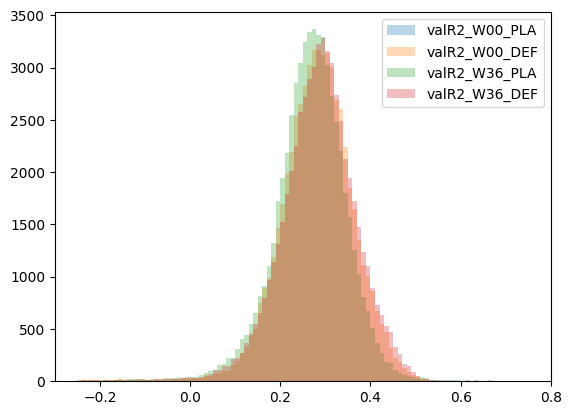

In [50]:
fig, ax = plt.subplots()

tmp=np.array(valR2_W00_PLA_2)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_z=zscore(tmp_c,axis=1)
tmp_d=np.mean(tmp_z,axis=0)
ax.hist(tmp_d.ravel(),bins=100,range=[-0.25,0.75], alpha=0.3, label='valR2_W00_PLA')

tmp=np.array(valR2_W00_DEF_2)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_z=zscore(tmp_c,axis=1)
has_nan = np.isnan(tmp_z).any(axis=1)
tmp_d=np.mean(tmp_z[~has_nan, :],axis=0)
ax.hist(tmp_d.ravel(),bins=100,range=[-0.25,0.75], alpha=0.3, label='valR2_W00_DEF')

tmp=np.array(valR2_W36_PLA_2)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_z=zscore(tmp_c,axis=1)
tmp_d=np.mean(tmp_z,axis=0)
ax.hist(tmp_d.ravel(),bins=100,range=[-0.25,0.75], alpha=0.3, label='valR2_W36_PLA')

tmp=np.array(valR2_W36_DEF_2)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_z=zscore(tmp_c,axis=1)
has_nan = np.isnan(tmp_z).any(axis=1)
tmp_d=np.mean(tmp_z[~has_nan, :],axis=0)
ax.hist(tmp_d.ravel(),bins=100,range=[-0.25,0.75], alpha=0.3, label='valR2_W36_DEF')


plt.savefig(os.path.join(STUDY_PATH,"screenshots",f"distrib_norm.jpg"))

ax.legend()
plt.show()

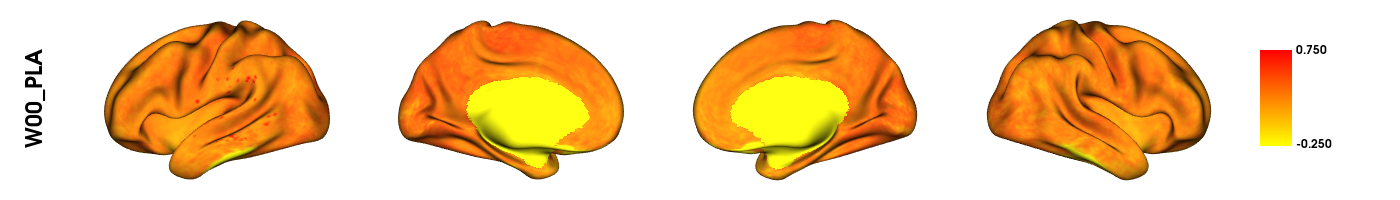

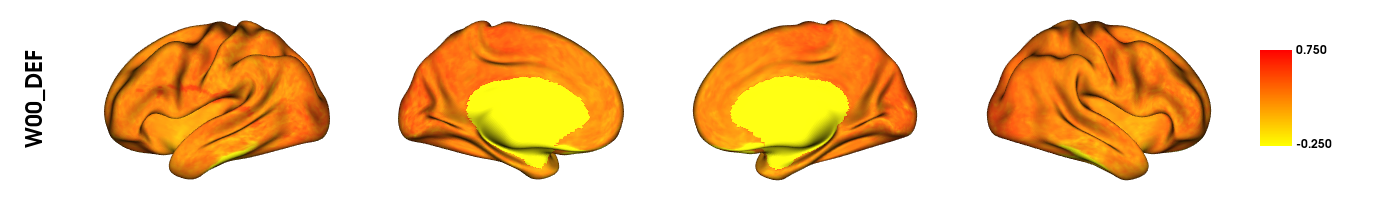

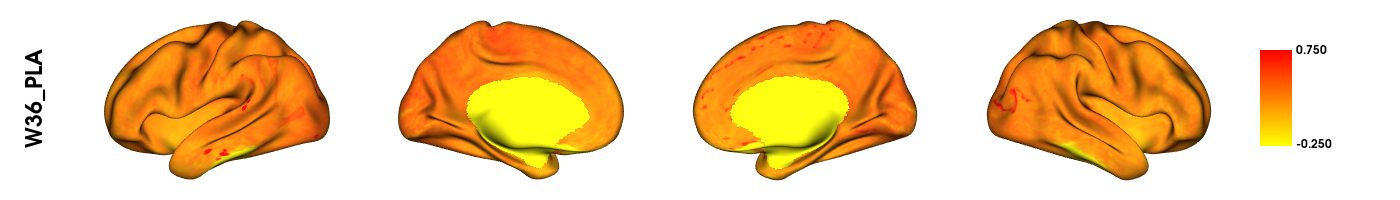

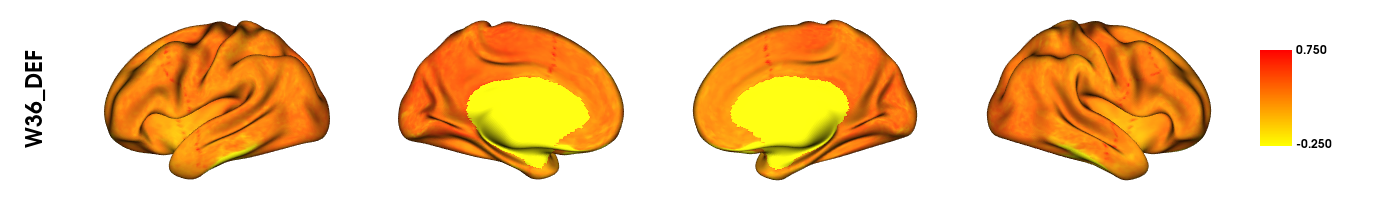

In [20]:
tmp=np.array(valR2_W00_PLA_2)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_z=zscore(tmp_c,axis=1)
has_nan = np.isnan(tmp_z).any(axis=1)
tmp_d=np.mean(tmp_z[~has_nan, :],axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_wb_W00_PLA.png")
plot_hemispheres(inflated_left_fslr32k,inflated_right_fslr32k,tmp_d, color_bar=True,color_range=(-0.25,0.75),
    label_text=["W00_PLA"], cmap="autumn_r", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12}, 
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))

tmp=np.array(valR2_W00_DEF_2)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_z=zscore(tmp_c,axis=1)
has_nan = np.isnan(tmp_z).any(axis=1)
tmp_d=np.mean(tmp_z[~has_nan, :],axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_wb_W00_DEF.png")
plot_hemispheres(inflated_left_fslr32k,inflated_right_fslr32k,tmp_d, color_bar=True,color_range=(-0.25,0.75),
    label_text=["W00_DEF"], cmap="autumn_r", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12}, 
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))

tmp=np.array(valR2_W36_PLA_2)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_z=zscore(tmp_c,axis=1)
has_nan = np.isnan(tmp_z).any(axis=1)
tmp_d=np.mean(tmp_z[~has_nan, :],axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_wb_W36_PLA.png")
plot_hemispheres(inflated_left_fslr32k,inflated_right_fslr32k,tmp_d, color_bar=True,color_range=(-0.25,0.75),
    label_text=["W36_PLA"], cmap="autumn_r", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12}, 
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))

tmp=np.array(valR2_W36_DEF_2)
tmp_c=np.clip(tmp,np.quantile(tmp,0.01),np.quantile(tmp,0.99))
tmp_z=zscore(tmp_c,axis=1)
has_nan = np.isnan(tmp_z).any(axis=1)
tmp_d=np.mean(tmp_z[~has_nan, :],axis=0)
has_nan = np.isnan(tmp).any(axis=1)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"R2_wb_W36_DEF.png")
plot_hemispheres(inflated_left_fslr32k,inflated_right_fslr32k,tmp_d, color_bar=True,color_range=(-0.25,0.75),
    label_text=["W36_DEF"], cmap="autumn_r", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12}, 
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))

In [21]:
df_4test['GROUP'] = df_4test['GROUP'].replace({1: 'DEF', 2: 'PLA'})
print(df_4test)

          QC_3DT1_W00  QC_3DMULTI_W00  RV_CQ_ORIENTATION_W00  QC_3DT1_W36  \
SUBJ                                                                        
101001YM          3.0             4.0                    NaN          4.0   
101003DM          4.0             4.0                    NaN          4.0   
101004NW          4.0             4.0                    NaN          4.0   
101005CT          4.0             4.0                    NaN          4.0   
101006BG          4.0             3.0                    NaN          4.0   
...               ...             ...                    ...          ...   
701001AA          4.0             3.0                    NaN          4.0   
703009AA          4.0             3.0                    NaN          4.0   
703010AA          4.0             4.0                    NaN          4.0   
703011AA          4.0             4.0                    NaN          4.0   
703013AA          4.0             4.0                    NaN          4.0   

# DEF vs PLA à WOO

In [22]:
val_R2=np.concatenate([np.array(valR2_W00_PLA),np.array(valR2_W00_DEF)],axis=0)
df_val=pd.concat([df_4test[df_4test['GROUP']=="PLA"],df_4test[df_4test['GROUP']=="DEF"]])

In [23]:
from brainstat.stats.terms import FixedEffect
term_group = FixedEffect(df_val.GROUP)
model_group = term_group
contrast_group = (df_val.GROUP == "PLA").astype(int) - (df_val.GROUP == "DEF").astype(
    int
)

In [24]:
from brainstat.stats.SLM import SLM
slm_group = SLM(
    model_group,
    contrast_group,
    surf=pial_combined,
    mask=mask,
    correction=["fdr", "rft"],
    two_tailed=True,
    cluster_threshold=0.05,
)
slm_group.fit(val_R2)

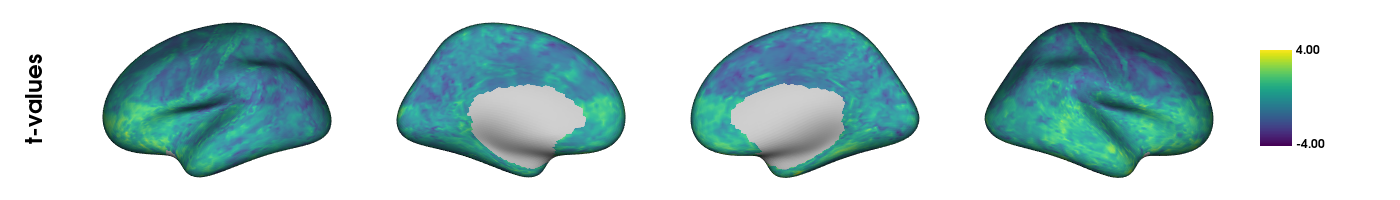

In [25]:
plot_hemispheres(inflated_left,inflated_right, slm_group.t, color_bar=True, color_range=(-4, 4),
        label_text=["t-values"], cmap="viridis", embed_nb=True, size=(1400, 200), zoom=1.45,
        nan_color=(0.7, 0.7, 0.7, 1), transparent_bg=False,cb__labelTextProperty={"fontSize": 12}, interactive=False)

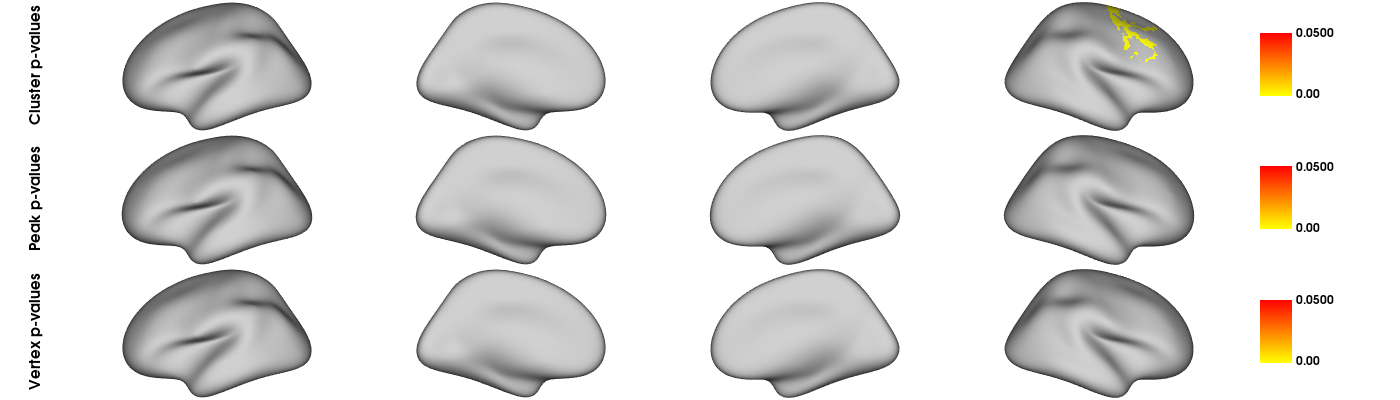

In [26]:
cp = [np.copy(slm_group.P["pval"]["C"])]
[np.place(x, np.logical_or(x > 0.05, ~mask), np.nan) for x in cp]

pp = [np.copy(slm_group.P["pval"]["P"])]
[np.place(x, np.logical_or(x > 0.05, ~mask), np.nan) for x in pp]

qp = [np.copy(slm_group.Q)]
[np.place(x, np.logical_or(x > 0.05, ~mask), np.nan) for x in qp]

vals = np.vstack([cp[0].T, pp[0].T, qp[0].T])

plot_hemispheres(inflated_left,inflated_right,vals, color_bar=True, color_range=(0, 0.05),
        label_text=["Cluster p-values", "Peak p-values", "Vertex p-values"], cmap="autumn_r", 
        embed_nb=True, size=(1400, 400), zoom=1.8, nan_color=(0.7, 0.7, 0.7, 1), 
        cb__labelTextProperty={"fontSize": 12},transparent_bg=False, interactive=False)

# DEF vs PLA à W36

In [27]:
val_R2=np.concatenate([np.array(valR2_W36_PLA),np.array(valR2_W36_DEF)],axis=0)
df_val=pd.concat([df_4test[df_4test['GROUP']=="PLA"],df_4test[df_4test['GROUP']=="DEF"]])

In [28]:
from brainstat.stats.terms import FixedEffect
term_group = FixedEffect(df_val.GROUP)
model_group = term_group
contrast_group = (df_val.GROUP == "PLA").astype(int) - (df_val.GROUP == "DEF").astype(
    int
)

In [29]:
from brainstat.stats.SLM import SLM
slm_group = SLM(
    model_group,
    contrast_group,
    surf=pial_combined,
    mask=mask,
    correction=["fdr", "rft"],
    two_tailed=True,
    cluster_threshold=0.05,
)
slm_group.fit(val_R2)

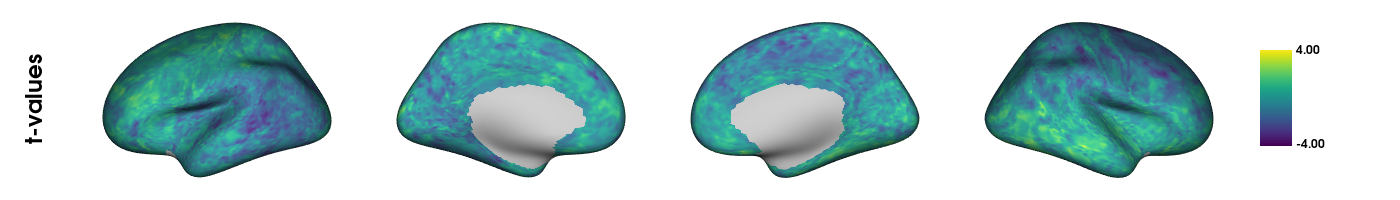

In [30]:
plot_hemispheres(inflated_left,inflated_right,slm_group.t, color_bar=True, color_range=(-4, 4),
        label_text=["t-values"], cmap="viridis", embed_nb=True, size=(1400, 200), zoom=1.45,
        nan_color=(0.7, 0.7, 0.7, 1), transparent_bg=False,cb__labelTextProperty={"fontSize": 12}, interactive=False)

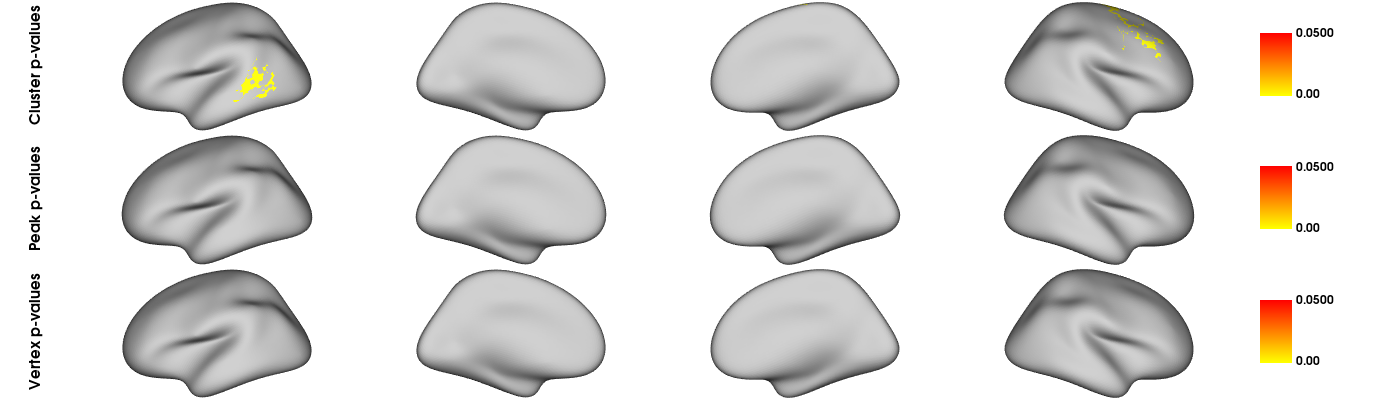

In [31]:
cp = [np.copy(slm_group.P["pval"]["C"])]
[np.place(x, np.logical_or(x > 0.05, ~mask), np.nan) for x in cp]

pp = [np.copy(slm_group.P["pval"]["P"])]
[np.place(x, np.logical_or(x > 0.05, ~mask), np.nan) for x in pp]

qp = [np.copy(slm_group.Q)]
[np.place(x, np.logical_or(x > 0.05, ~mask), np.nan) for x in qp]

vals = np.vstack([cp[0].T, pp[0].T, qp[0].T])

plot_hemispheres(inflated_left,inflated_right,vals, color_bar=True, color_range=(0, 0.05),
        label_text=["Cluster p-values", "Peak p-values", "Vertex p-values"], cmap="autumn_r", 
        embed_nb=True, size=(1400, 400), zoom=1.8, nan_color=(0.7, 0.7, 0.7, 1), 
        cb__labelTextProperty={"fontSize": 12},transparent_bg=False, interactive=False)

In [39]:
pial_left, pial_right = fetch_template_surface("fsaverage5",layer="pial",join=False)
inflated_left, inflated_right = fetch_template_surface("fsaverage5",layer="inflated",join=False)
pial_combined = fetch_template_surface("fsaverage5", join=True)
mask = fetch_mask("fsaverage5")
glasser = fetch_parcellation("fsaverage5", "glasser", 360)

pial_left_fslr32k, pial_right_fslr32k = fetch_template_surface("fslr32k", join=False)
inflated_left_fslr32k,inflated_right_fslr32k = fetch_template_surface("fslr32k",layer="inflated", join=False)
pial_combined_fslr32k = fetch_template_surface("fslr32k", join=True)
mask_fslr32k = fetch_mask("fslr32k")
glasser_fslr32k = fetch_parcellation("fslr32k", "glasser", 360)

print(f"number of unique values in glasser fsaverage5 : {len(np.unique(glasser))},and in glasser fslr32k :{len(np.unique(glasser_fslr32k))}")
print(f"number of points in fslr32k corresponds with number of values  : {glasser_fslr32k.shape} {inflated_right_fslr32k.GetPoints().shape} {inflated_left_fslr32k.GetPoints().shape}")
print(f"number of points in fsaverage does not correspond with number of values  : {glasser.shape},{inflated_right.GetPoints().shape},{inflated_left.GetPoints().shape}")

plot_hemispheres(inflated_left_fslr32k,inflated_right_fslr32k,glasser_fslr32k, color_bar=True,
        label_text=["Glasser"], cmap="jet", 
        embed_nb=True, size=(1400, 400), zoom=1.2, nan_color=(0.7, 0.7, 0.7, 1), 
        cb__labelTextProperty={"fontSize": 12},transparent_bg=False, interactive=False)

plot_hemispheres(inflated_left,inflated_right,glasser, color_bar=True,
        label_text=["Glasser"], cmap="jet", 
        embed_nb=True, size=(1400, 400), zoom=1.2, nan_color=(0.7, 0.7, 0.7, 1), 
        cb__labelTextProperty={"fontSize": 12},transparent_bg=False, interactive=False)


number of unique values in glasser fsaverage5 : 32608,and in glasser fslr32k :361
number of points in fslr32k corresponds with number of values  : (64984,) (32492, 3) (32492, 3)
number of points in fsaverage does not correspond with number of values  : (42734,),(10242, 3),(10242, 3)


ValueError: Array shape is not valid.

In [35]:
for nd in valR2_W00_PLA,valR2_W00_DEF,valR2_W36_PLA,valR2_W36_DEF:
    ndtmp=np.array(nd)
    resultats = np.zeros((ndtmp.shape[0],361))
    for cpt,ligne in enumerate(ndtmp):
        resultats[cpt,:]=[np.median(ligne[glasser_fslr32k==x])for x in np.unique(glasser_fslr32k)]
    resultats_c=np.clip(resultats,np.quantile(resultats,0.01),np.quantile(resultats,0.99))
    #plt.figure();__=plt.hist(resultats.ravel(),200,range=[0,0.1])
    #plt.figure();__=plt.hist(resultats_z.ravel(),200,range=[-1.5,1])
    
#resultats_z=zscore(resultats_c,axis=0)
    #cov = np.cov(np.transpose(resultats_c))
    cov=np.corrcoef(np.transpose(resultats_c))
#resultats_z=zscore(resultats_c,axis=0)
    #cov=zscore(covt,axis=0)
    for i in range(len(cov)):
        cov[i, i] = 0
    cov_fisher = scipy.special.logit(cov)
    #plt.figure();__=plt.hist(cov.ravel(),200,range=[-.25,0.25])
    plt.figure()
    print(np.min(cov_fisher.ravel()),np.max(cov_fisher.ravel()))
    plt.imshow(cov_fisher)
    #plt.figure()
    #plt.imshow(cov_fisher)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 20484 but corresponding boolean dimension is 64984

In [33]:
df_cort = pd.read_excel(os.path.join("/NAS","tupac","protocoles","PULSE",'df_glasser360.xlsx'))
cols=[col[8:] for col in df_cort.filter(regex="Mediane").columns]

for str_nam,nd in zip(["valR2_W00_PLA","valR2_W00_DEF","valR2_W36_PLA","valR2_W36_DEF"],[valR2_W00_PLA,valR2_W00_DEF,valR2_W36_PLA,valR2_W36_DEF]):
    ndtmp=np.array(nd)
    resultats = np.zeros((ndtmp.shape[0],361))
    for cpt,ligne in enumerate(ndtmp):
        resultats[cpt,:]=[np.median(ligne[glasser==x])for x in np.unique(glasser)]
    resultats_c=np.clip(resultats,np.quantile(resultats,0.01),np.quantile(resultats,0.99))
    plt.figure()
    fig, ax = plt.subplots()
    __=plt.hist(resultats.ravel(),bins=100, alpha=0.3, label=str_nam)
    __=plt.hist(resultats_c.ravel(),bins=100, alpha=0.3, label=str_nam+"_thres")
    print(np.quantile(resultats,0.),np.quantile(resultats,1))
    print(np.quantile(resultats_c,0),np.quantile(resultats_c,1))
    ax.legend()
    plt.show()  

tmp=np.array(valR2_W00_PLA)
tmp_c=np.clip(tmp,np.quantile(tmp,0),np.quantile(tmp,0.99))
#tmp_z=zscore(tmp_c,axis=0)
tmp_d=np.median(tmp_c,axis=0)

    #df = pd.DataFrame(resultats_c[:,1:],index=df_4test[df_4test['GROUP']==print(str_nam[-3:])].index, columns=cols)
    #df.to_csv(os.path.join(DIR,f"R2mediane_glasser4{str_nam}.csv"))

FileNotFoundError: [Errno 2] No such file or directory: '/NAS/tupac/protocoles/PULSE/df_glasser360.xlsx'

In [42]:
import networkx as nx

G = nx.from_numpy_array(cov)
# Vérifier les nœuds et les arêtes du graph
partition=nx.community.louvain_communities(G, seed=123)

# Appliquer l'algorithme de Louvain à l'aide de networkx
partition = nx.algorithms.community.louvain_communities(G)

# Obtenir les communautés
communities = {value: list(nodes) for value, nodes in enumerate(partition)}
# Réorganiser la matrice de connectivité en fonction des communautés
reordered_nodes = sorted(G.nodes(), key=lambda x: next(value for value, nodes in communities.items() if x in nodes))
reordered_matrix = cov[np.ix_(reordered_nodes, reordered_nodes)]

print("Matrice de connectivité réorganisée :")
print(reordered_matrix)

Matrice de connectivité réorganisée :
[[ 0.          0.020239   -0.09190056 ...  0.00727719  0.01437246
  -0.07115775]
 [ 0.020239    0.          0.02878431 ... -0.02963911 -0.18426718
   0.00251062]
 [-0.09190056  0.02878431  0.         ... -0.05350005 -0.35230976
   0.03588754]
 ...
 [ 0.00727719 -0.02963911 -0.05350005 ...  0.          0.16205093
  -0.04554598]
 [ 0.01437246 -0.18426718 -0.35230976 ...  0.16205093  0.
  -0.22162638]
 [-0.07115775  0.00251062  0.03588754 ... -0.04554598 -0.22162638
   0.        ]]


In [338]:
data = []
start_index = df_val.index.get_loc('103019HS')  # obtenir la position de l'index spécifique
#for cpt,SUBJ in enumerate(df_val.iloc[start_index+1:].index): #enumerate(['105009AM']): 
for cpt,SUBJ in enumerate(df_val.drop(['103019HS']).index): # enumerate(df_val.index): 
    for SES in ['W00','W36']:
        print(SUBJ)
        file_CER=os.path.join(STUDY_PATH,'Atlas_Seg',f'sub-{SUBJ}_ses-{SES}',f'Cerebellum-SUIT_sub-{SUBJ}_ses-{SES}_on3DT1.nii.gz')
        if (not os.path.exists(file_CER)) :
            print(f'fichier file_SEG manquant pour {SUBJ} {cpt}')
        CER=nib.load(file_CER).get_fdata()
        file_R2=os.path.join(STUDY_PATH,'T2Maps',f'rRAS_R2Map_sub-{SUBJ}_ses-{SES}.nii.gz')
        if (not os.path.exists(file_R2)) :        
            print(f'fichier file_R2 manquant pour {SUBJ} {cpt}')
        R2=nib.load(file_R2).get_fdata()
        file_VOL=glob.glob(os.path.join(STUDY_PATH,'Volbrain_Seg_V2',f'sub_{SUBJ}_ses_{SES}','native_structures_std_native_*.nii.gz'))[0]
        print(file_VOL)
        if (not os.path.exists(file_VOL)) :
            print(f'fichier Volbrain manquant pour {SUBJ} {cpt}')
        VOL=nib.load(file_VOL).get_fdata()
                
        #Volbrain
        print(len(np.unique(VOL)))
        val_vol=[np.median(R2[VOL==x])for x in np.unique(VOL)]
        
        #Cerebellum
        val_cer=[np.median(R2[CER==x])for x in np.unique(CER)]
        print(np.unique(CER))

        #Keuken
        l_sscor=glob.glob(os.path.join(STUDY_PATH,'Atlas_Seg',f'sub-{SUBJ}_ses-{SES}','*_std_ras.nii.gz'))
        keuken=list()
        for file in l_sscor:
            SEG=nib.load(file).get_fdata()
            keuken.append(np.sum(np.multiply(SEG,R2))/np.sum(SEG))
        val_keu=np.array(keuken)
        
        #Glasser            
        print(np.hstack([val_vol,val_cer,val_keu]).shape[0])
        df_tableau = pd.DataFrame(np.hstack([val_vol,val_cer,val_keu]).reshape(1, -1), columns=[f"Colonne_{i+1}" for i in range(np.hstack([val_vol,val_cer,val_keu]).shape[0])]) # Convertit le tableau en DataFrame
        df_tableau.insert(0, "Nom_sujet", SUBJ) # Ajoute la colonne "Nom_sujet" en première position
        df_tableau.insert(1, "Session", SES) # Ajoute la colonne "Groupe" en deuxième position
        data.append(df_tableau) # Ajoute le DataFrame à la liste

101001YM
/NAS/dumbo/protocoles/FAIRPARKII/Volbrain_Seg_V2/sub_101001YM_ses_W00/native_structures_std_native_n_mmni_fjob322361.nii.gz
133
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]
180
101001YM
/NAS/dumbo/protocoles/FAIRPARKII/Volbrain_Seg_V2/sub_101001YM_ses_W36/native_structures_std_native_n_mmni_fjob322362.nii.gz
133
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]
180
101005CT
/NAS/dumbo/protocoles/FAIRPARKII/Volbrain_Seg_V2/sub_101005CT_ses_W00/native_structures_std_native_n_mmni_fjob322919.nii.gz
133
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]
180
101005CT
/NAS/dumbo/protocoles/FAIRPARKII/Volbrain_Seg_V2/sub_101005CT_ses_W36/native_structures_std_native_n_mmni_fjob322997.nii.gz
133
[ 0.  1.  2

KeyboardInterrupt: 

In [305]:
test=pd.DataFrame()
for ind in data_tmp+data_tmp2: #data
    test=pd.concat([test,ind])
test.iloc[:,2:] *= 1000
nouveaux_noms = ["SUBJ_ID","SES","EXT_VOL","3rd ventricle","4th ventricle","Right accumbens","Left accumbens","Left amygdala","Right amygdala","Brainstem","Right caudate","Left caudate","Right cerebellum exterior","Left cerebellum exterior","Right cerebellum White Matter","Left cerebellum White Matter","Right cerebral White Matter","Left cerebral White Matter","Right hippocampus","Left hippocampus","Right inf. lateral ventricle","Left inf. lateral ventricle","Right lateral ventricle","Left lateral ventricle","Right pallidum","Left pallidum","Right putamen","Left putamen","Right thalamus","Left thalamus","Right ventral DC","Left ventral DC","Lobules I-V","Lobules VI-VII","Lobules VIII-X","Left basal forebrain","Right basal forebrain","Right anterior cingulate gyrus","Left anterior cingulate gyrus","Right anterior insula","Left anterior insula","Right anterior orbital gyrus","Left anterior orbital gyrus","Right angular gyrus","Left angular gyrus","Right calcarine cortex","Left calcarine cortex","Right central operculum","Left central operculum","Right cuneus","Left cuneus","Right entorhinal area","Left entorhinal area","Right frontal operculum","Left frontal operculum","Right frontal pole","Left frontal pole","Right fusiform gyrus","Left fusiform gyrus","Right gyrus rectus","Left gyrus rectus","Right inf. occipital gyrus","Left inf. occipital gyrus","Right inf. temporal gyrus","Left inf. temporal gyrus","Right lingual gyrus","Left lingual gyrus","Right lateral orbital gyrus","Left lateral orbital gyrus","Right middle cingulate gyrus","Left middle cingulate gyrus","Right medial frontal cortex","Left medial frontal cortex","Right middle frontal gyrus","Left middle frontal gyrus","Right middle occipital gyrus","Left middle occipital gyrus","Right medial orbital gyrus","Left medial orbital gyrus","Right postcentral gyrus medial segment","Left postcentral gyrus medial segment","Right precentral gyrus medial segment","Left precentral gyrus medial segment","Right sup. frontal gyrus medial segment","Left sup. frontal gyrus medial segment","Right middle temporal gyrus","Left middle temporal gyrus","Right occipital pole","Left occipital pole","Right occipital fusiform gyrus","Left occipital fusiform gyrus","Right opercular inf. frontal gyrus","Left opercular inf. frontal gyrus","Right orbital inf. frontal gyrus","Left orbital inf. frontal gyrus","Right posterior cingulate gyrus","Left posterior cingulate gyrus","Right precuneus","Left precuneus","Right parahippocampal gyrus","Left parahippocampal gyrus","Right posterior insula","Left posterior insula","Right parietal operculum","Left parietal operculum","Right postcentral gyrus","Left postcentral gyrus","Right posterior orbital gyrus","Left posterior orbital gyrus","Right planum polare","Left planum polare","Right precentral gyrus","Left precentral gyrus","Right planum temporale","Left planum temporale","Right subcallosal area","Left subcallosal area","Right sup. frontal gyrus","Left sup. frontal gyrus","Right supplementary motor cortex","Left supplementary motor cortex","Right supramarginal gyrus","Left supramarginal gyrus","Right sup. occipital gyrus","Left sup. occipital gyrus","Right sup. parietal lobule","Left sup. parietal lobule","Right sup. temporal gyrus","Left sup. temporal gyrus","Right temporal pole","Left temporal pole","Right triangular inf. frontal gyrus","Left triangular inf. frontal gyrus","Right transverse temporal gyrus","Left transverse temporal gyrus","EXT_CER","Left_I_IV","Right_I_IV","Left_V","Right_V","Left_VI","Vermis_VI","Right_VI","Left_CrusI","Vermis_CrusI","Right_CrusI","Left_CrusII","Vermis_CrusII","Right_CrusII","Left_VIIb","Vermis_VIIb","Right_VIIb","Left_VIIIa","Vermis_VIIIa","Right_VIIIa","Left_VIIIb","Vermis_VIIIb","Right_VIIIb","Left_IX","Vermis_IX","Right_IX","Left_X","Vermis_X","Right_X","Left_Dentate","Right_Dentate","Left_Interposed","Right_Interposed","Left_Fastigial","Right_Fastigial","Right RN","Left Gpi","Left Gpe","Right STR","Right Gpi","Right SN","Left RN","Left SN","Right Sth","Left Sth","Right Gpe","Left STR"]
# Création d'un dictionnaire qui mappe les anciens noms de colonnes aux nouveaux noms de colonnes
renommage = {ancien_nom: nouveau_nom for ancien_nom, nouveau_nom in zip(test.columns, nouveaux_noms)}
df = test.rename(columns=renommage)

In [ ]:
medianeR2_lat_sscort=pd.concat(data, ignore_index=True)
nouveaux_noms = ["SUBJ_ID","SES","EXT_VOL","3rd ventricle","4th ventricle","Right accumbens","Left accumbens","Left amygdala","Right amygdala","Brainstem","Right caudate","Left caudate","Right cerebellum exterior","Left cerebellum exterior","Right cerebellum White Matter","Left cerebellum White Matter","Right cerebral White Matter","Left cerebral White Matter","Right hippocampus","Left hippocampus","Right inf. lateral ventricle","Left inf. lateral ventricle","Right lateral ventricle","Left lateral ventricle","Right pallidum","Left pallidum","Right putamen","Left putamen","Right thalamus","Left thalamus","Right ventral DC","Left ventral DC","Lobules I-V","Lobules VI-VII","Lobules VIII-X","Left basal forebrain","Right basal forebrain","Right anterior cingulate gyrus","Left anterior cingulate gyrus","Right anterior insula","Left anterior insula","Right anterior orbital gyrus","Left anterior orbital gyrus","Right angular gyrus","Left angular gyrus","Right calcarine cortex","Left calcarine cortex","Right central operculum","Left central operculum","Right cuneus","Left cuneus","Right entorhinal area","Left entorhinal area","Right frontal operculum","Left frontal operculum","Right frontal pole","Left frontal pole","Right fusiform gyrus","Left fusiform gyrus","Right gyrus rectus","Left gyrus rectus","Right inf. occipital gyrus","Left inf. occipital gyrus","Right inf. temporal gyrus","Left inf. temporal gyrus","Right lingual gyrus","Left lingual gyrus","Right lateral orbital gyrus","Left lateral orbital gyrus","Right middle cingulate gyrus","Left middle cingulate gyrus","Right medial frontal cortex","Left medial frontal cortex","Right middle frontal gyrus","Left middle frontal gyrus","Right middle occipital gyrus","Left middle occipital gyrus","Right medial orbital gyrus","Left medial orbital gyrus","Right postcentral gyrus medial segment","Left postcentral gyrus medial segment","Right precentral gyrus medial segment","Left precentral gyrus medial segment","Right sup. frontal gyrus medial segment","Left sup. frontal gyrus medial segment","Right middle temporal gyrus","Left middle temporal gyrus","Right occipital pole","Left occipital pole","Right occipital fusiform gyrus","Left occipital fusiform gyrus","Right opercular inf. frontal gyrus","Left opercular inf. frontal gyrus","Right orbital inf. frontal gyrus","Left orbital inf. frontal gyrus","Right posterior cingulate gyrus","Left posterior cingulate gyrus","Right precuneus","Left precuneus","Right parahippocampal gyrus","Left parahippocampal gyrus","Right posterior insula","Left posterior insula","Right parietal operculum","Left parietal operculum","Right postcentral gyrus","Left postcentral gyrus","Right posterior orbital gyrus","Left posterior orbital gyrus","Right planum polare","Left planum polare","Right precentral gyrus","Left precentral gyrus","Right planum temporale","Left planum temporale","Right subcallosal area","Left subcallosal area","Right sup. frontal gyrus","Left sup. frontal gyrus","Right supplementary motor cortex","Left supplementary motor cortex","Right supramarginal gyrus","Left supramarginal gyrus","Right sup. occipital gyrus","Left sup. occipital gyrus","Right sup. parietal lobule","Left sup. parietal lobule","Right sup. temporal gyrus","Left sup. temporal gyrus","Right temporal pole","Left temporal pole","Right triangular inf. frontal gyrus","Left triangular inf. frontal gyrus","Right transverse temporal gyrus","Left transverse temporal gyrus","EXT_CER","Left_I_IV","Right_I_IV","Left_V","Right_V","Left_VI","Vermis_VI","Right_VI","Left_CrusI","Vermis_CrusI","Right_CrusI","Left_CrusII","Vermis_CrusII","Right_CrusII","Left_VIIb","Vermis_VIIb","Right_VIIb","Left_VIIIa","Vermis_VIIIa","Right_VIIIa","Left_VIIIb","Vermis_VIIIb","Right_VIIIb","Left_IX","Vermis_IX","Right_IX","Left_X","Vermis_X","Right_X","Left_Dentate","Right_Dentate","Left_Interposed","Right_Interposed","Left_Fastigial","Right_Fastigial","Right RN","Left Gpi","Left Gpe","Right STR","Right Gpi","Right SN","Left RN","Left SN","Right Sth","Left Sth","Right Gpe","Left STR"]
# Création d'un dictionnaire qui mappe les anciens noms de colonnes aux nouveaux noms de colonnes
renommage = {ancien_nom: nouveau_nom for ancien_nom, nouveau_nom in zip(medianeR2_lat_sscort.columns, nouveaux_noms)}
df = medianeR2_lat_sscort.rename(columns=renommage)
#medianeR2_lat_sscort.to_csv(os.path.join(STUDY_PATH,"medianeR2_lat_sscort.csv"))
#df.to_csv(os.path.join(STUDY_PATH,"medianeR2_lat_sscort.csv"))

In [364]:
# medianeR2_lat_sscort semble egale à 1000/df

medianeR2_lat_sscort[medianeR2_lat_sscort['SES']=="W00"].loc['703011AA']['Right RN']

1000/df.loc[df['SES']=="W00"].loc['703011AA']['Right RN']

37.5910968178058

In [ ]:
file_R2=os.path.join(STUDY_PATH,'T2Maps',f'rRAS_R2Map_sub-703011AA_ses-W00.nii.gz')
R2=nib.load(file_R2).get_fdata()
l_sscor=glob.glob(os.path.join(STUDY_PATH,'Atlas_Seg',f'sub-703011AA_ses-W00','*_std_ras.nii.gz'))
keuken=list()
for file in l_sscor.sort():
    SEG=nib.load(file).get_fdata()
    keuken.append(np.sum(np.multiply(SEG,R2))/np.sum(SEG))
    print(file,(np.sum(np.multiply(SEG,R2))/np.sum(SEG))*1000)
val_keu=np.array(keuken)

/NAS/dumbo/protocoles/FAIRPARKII/Atlas_Seg/sub-703011AA_ses-W00/GPi_L_sub-703011AA_ses-W00_on3DT1_std_ras.nii.gz 26.985447481046176
/NAS/dumbo/protocoles/FAIRPARKII/Atlas_Seg/sub-703011AA_ses-W00/RN_L_sub-703011AA_ses-W00_on3DT1_std_ras.nii.gz 27.57309867891068
/NAS/dumbo/protocoles/FAIRPARKII/Atlas_Seg/sub-703011AA_ses-W00/GPe_R_sub-703011AA_ses-W00_on3DT1_std_ras.nii.gz 34.46021224528156
/NAS/dumbo/protocoles/FAIRPARKII/Atlas_Seg/sub-703011AA_ses-W00/GPi_R_sub-703011AA_ses-W00_on3DT1_std_ras.nii.gz 31.24668341914068
/NAS/dumbo/protocoles/FAIRPARKII/Atlas_Seg/sub-703011AA_ses-W00/GPe_L_sub-703011AA_ses-W00_on3DT1_std_ras.nii.gz 29.733650885891514
/NAS/dumbo/protocoles/FAIRPARKII/Atlas_Seg/sub-703011AA_ses-W00/STh_L_sub-703011AA_ses-W00_on3DT1_std_ras.nii.gz 25.349221471051457
/NAS/dumbo/protocoles/FAIRPARKII/Atlas_Seg/sub-703011AA_ses-W00/STR_R_sub-703011AA_ses-W00_on3DT1_std_ras.nii.gz 28.24583878573559
/NAS/dumbo/protocoles/FAIRPARKII/Atlas_Seg/sub-703011AA_ses-W00/STR_L_sub-703011A

In [804]:
glasser360_aires_list = ["EXT","L_V1","L_MST","L_V6","L_V2","L_V3","L_V4","L_V8","L_4","L_3b","L_FEF","L_PEF","L_55b","L_V3A","L_RSC","L_POS2","L_V7","L_IPS1","L_FFC","L_V3B","L_LO1","L_LO2","L_PIT","L_MT","L_A1","L_PSL","L_SFL","L_PCV","L_STV","L_7Pm","L_7m","L_POS1","L_23d","L_v23ab","L_d23ab","L_31pv","L_5m","L_5mv","L_23c","L_5L","L_24dd","L_24dv","L_7AL","L_SCEF","L_6ma","L_7Am","L_7PL","L_7PC","L_LIPv","L_VIP","L_MIP","L_1","L_2","L_3a","L_6d","L_6mp","L_6v","L_p24pr","L_33pr","L_a24pr","L_p32pr","L_a24","L_d32","L_8BM","L_p32","L_10r","L_47m","L_8Av","L_8Ad","L_9m","L_8BL","L_9p","L_10d","L_8C","L_44","L_45","L_47l","L_a47r","L_6r","L_IFJa","L_IFJp","L_IFSp","L_IFSa","L_p9-46v","L_46","L_a9-46v","L_9-46d","L_9a","L_10v","L_a10p","L_10pp","L_11l","L_13l","L_OFC","L_47s","L_LIPd","L_6a","L_i6-8","L_s6-8","L_43","L_OP4","L_OP1","L_OP2-3","L_52","L_RI","L_PFcm","L_PoI2","L_TA2","L_FOP4","L_MI","L_Pir","L_AVI","L_AAIC","L_FOP1","L_FOP3","L_FOP2","L_PFt","L_AIP","L_EC","L_PreS","L_H","L_ProS","L_PeEc","L_STGa","L_PBelt","L_A5","L_PHA1","L_PHA3","L_STSda","L_STSdp","L_STSvp","L_TGd","L_TE1a","L_TE1p","L_TE2a","L_TF","L_TE2p","L_PHT","L_PH","L_TPOJ1","L_TPOJ2","L_TPOJ3","L_DVT","L_PGp","L_IP2","L_IP1","L_IP0","L_PFop","L_PF","L_PFm","L_PGi","L_PGs","L_V6A","L_VMV1","L_VMV3","L_PHA2","L_V4t","L_FST","L_V3CD","L_LO3","L_VMV2","L_31pd","L_31a","L_VVC","L_25","L_s32","L_pOFC","L_PoI1","L_Ig","L_FOP5","L_p10p","L_p47r","L_TGv","L_MBelt","L_LBelt","L_A4","L_STSva","L_TE1m","L_PI","L_a32pr","L_p24","R_V1","R_MST","R_V6","R_V2","R_V3","R_V4","R_V8","R_4","R_3b","R_FEF","R_PEF","R_55b","R_V3A","R_RSC","R_POS2","R_V7","R_IPS1","R_FFC","R_V3B","R_LO1","R_LO2","R_PIT","R_MT","R_A1","R_PSL","R_SFL","R_PCV","R_STV","R_7Pm","R_7m","R_POS1","R_23d","R_v23ab","R_d23ab","R_31pv","R_5m","R_5mv","R_23c","R_5L","R_24dd","R_24dv","R_7AL","R_SCEF","R_6ma","R_7Am","R_7PL","R_7PC","R_LIPv","R_VIP","R_MIP","R_1","R_2","R_3a","R_6d","R_6mp","R_6v","R_p24pr","R_33pr","R_a24pr","R_p32pr","R_a24","R_d32","R_8BM","R_p32","R_10r","R_47m","R_8Av","R_8Ad","R_9m","R_8BL","R_9p","R_10d","R_8C","R_44","R_45","R_47l","R_a47r","R_6r","R_IFJa","R_IFJp","R_IFSp","R_IFSa","R_p9-46v","R_46","R_a9-46v","R_9-46d","R_9a","R_10v","R_a10p","R_10pp","R_11l","R_13l","R_OFC","R_47s","R_LIPd","R_6a","R_i6-8","R_s6-8","R_43","R_OP4","R_OP1","R_OP2-3","R_52","R_RI","R_PFcm","R_PoI2","R_TA2","R_FOP4","R_MI","R_Pir","R_AVI","R_AAIC","R_FOP1","R_FOP3","R_FOP2","R_PFt","R_AIP","R_EC","R_PreS","R_H","R_ProS","R_PeEc","R_STGa","R_PBelt","R_A5","R_PHA1","R_PHA3","R_STSda","R_STSdp","R_STSvp","R_TGd","R_TE1a","R_TE1p","R_TE2a","R_TF","R_TE2p","R_PHT","R_PH","R_TPOJ1","R_TPOJ2","R_TPOJ3","R_DVT","R_PGp","R_IP2","R_IP1","R_IP0","R_PFop","R_PF","R_PFm","R_PGi","R_PGs","R_V6A","R_VMV1","R_VMV3","R_PHA2","R_V4t","R_FST","R_V3CD","R_LO3","R_VMV2","R_31pd","R_31a","R_VVC","R_25","R_s32","R_pOFC","R_PoI1","R_Ig","R_FOP5","R_p10p","R_p47r","R_TGv","R_MBelt","R_LBelt","R_A4","R_STSva","R_TE1m","R_PI","R_a32pr","R_p24"]
process_line = lambda line : [np.mean(line[glasser==x]) for x in np.unique(glasser)]

processed_line = list(map(process_line,valR2_W36_DEF))
df_W36_DEF=pd.DataFrame(np.array(processed_line)*1000,index=liste_DEF,columns=glasser360_aires_list).drop(columns=['EXT']).assign(SES=["W36"]*len(liste_DEF))
df_W36_DEF.set_index('SES', append=True, inplace=True)
df_W36_DEF.reset_index(inplace=True)
df_W36_DEF.rename(columns={'level_0': 'SUBJ_ID'}, inplace=True)

processed_line = list(map(process_line,valR2_W36_PLA))
df_W36_PLA=pd.DataFrame(np.array(processed_line)*1000,index=liste_PLA,columns=glasser360_aires_list).drop(columns=['EXT']).assign(SES=["W36"]*len(liste_PLA))
df_W36_PLA.set_index('SES', append=True, inplace=True)
df_W36_PLA.reset_index(inplace=True)
df_W36_PLA.rename(columns={'level_0': 'SUBJ_ID'}, inplace=True)

processed_line = list(map(process_line,valR2_W00_PLA))
df_W00_PLA=pd.DataFrame(np.array(processed_line)*1000,index=liste_PLA,columns=glasser360_aires_list).drop(columns=['EXT']).assign(SES=["W00"]*len(liste_PLA))
df_W00_PLA.set_index('SES', append=True, inplace=True)
df_W00_PLA.reset_index(inplace=True)
df_W00_PLA.rename(columns={'level_0': 'SUBJ_ID'}, inplace=True)

processed_line = list(map(process_line,valR2_W00_DEF))
df_W00_DEF=pd.DataFrame(np.array(processed_line)*1000,index=liste_DEF,columns=glasser360_aires_list).drop(columns=['EXT']).assign(SES=["W00"]*len(liste_DEF))
df_W00_DEF.set_index('SES', append=True, inplace=True)
df_W00_DEF.reset_index(inplace=True)
df_W00_DEF.rename(columns={'level_0': 'SUBJ_ID'}, inplace=True)

FUll_cort=pd.concat([df_W36_DEF,df_W36_PLA,df_W00_PLA,df_W00_DEF])#.set_index('SES', append=True, inplace=True)
print(FUll_cort.shape)

#SOUS-CORTICALES
medianeR2_lat_sscort = pd.read_csv(os.path.join(STUDY_PATH,"medianeR2_lat_sscort.csv"))
#medianeR2_lat_sscort.set_index(['SUBJ_ID','SES'], inplace=True)
# Sélectionner les colonnes numériques
num_cols = medianeR2_lat_sscort.select_dtypes(include=[np.number]).columns
# Appliquer un calcul vectorisé à toutes les valeurs numériques
medianeR2_lat_sscort[num_cols] = (1/(medianeR2_lat_sscort[num_cols]))*1000
print(medianeR2_lat_sscort.shape)

#MERGE
FULL_FULL=pd.merge(medianeR2_lat_sscort,FUll_cort,how="left", on=["SUBJ_ID", "SES"])
FULL_FULL.drop(columns=['EXT_VOL','EXT_CER'], inplace=True)
#FULL_FULL.set_index(['SUBJ_ID','SES'], inplace=True)
print(FULL_FULL.shape)



(296, 362)
(296, 182)
(296, 540)


In [13]:
#FULL_FULL.to_csv(os.path.join(STUDY_PATH,"R2FULL_538_sscort_cort.csv"))
#103019HS
#105009AM
FULL_FULL=pd.read_csv(os.path.join(STUDY_PATH,"R2FULL_538_sscort_cort.csv"),index_col=[0])
FULL_FULL


SUBJ_ID  SES  3rd ventricle  4th ventricle  Right accumbens  \
0    101001YM  W00      18.171204      18.828230        26.414602   
1    101001YM  W36      18.649381      18.914041        25.469854   
2    101005CT  W00      18.974044      18.409018        27.445627   
3    101005CT  W36      18.710068      20.933644        25.678870   
4    101008NB  W00      18.591234      20.483508        24.346545   
..        ...  ...            ...            ...              ...   
291  503012EC  W36      18.511313      21.219409        23.918615   
292  703009AA  W00      18.740080      18.726829        25.589587   
293  703009AA  W36      18.245477      18.776924        25.380437   
294  703011AA  W00      17.809249      18.509275        27.412112   
295  703011AA  W36      19.256055      17.327501        27.451440   

     Left accumbens  Left amygdala  Right amygdala  Brainstem  Right caudate  \
0         27.097172      23.951045       23.832521  26.115995      26.849996   
1         25.323428      22.911024       22.951904  26.707482      27.215085   
2         27.286074      23.814728       23.245600  26.279194      28.890469   
3         27.143327      24.090600       23.668992  27.141539      29.967811   
4         25.499176      23.469186       23.130174  26.936304      26.748239   
..              ...            ...             ...        ...            ...   
291       24.310970      24.349252       22.324395  25.767137      27.729775   
292       27.873868      23.531021       23.677597  25.455466      26.538843   
293       25.645862      22.456266       23.018140  26.792440      27.070482   
294       25.748203      24.514627       20.770224  25.974884      30.388777   
295       25.266286      23.162449       23.181948  25.732459      29.579517   

     ...     R_p47r      R_TGv    R_MBelt    R_LBelt       R_A4    R_STSva  \
0    ...  26.626270  31.849415  25.557194  26.169202  27.940591  27.698209   
1    ...  27.046985  28.856076  25.578670  26.078443  28.398998  27.144139   
2    ...  25.230109  26.557649  26.648734  26.530872  26.684156  26.599118   
3    ...  24.843452  27.261529  26.660341  25.962560  26.616257  27.252678   
4    ...  25.686522  25.927017  24.330171  24.764357  25.731800  26.586775   
..   ...        ...        ...        ...        ...        ...        ...   
291  ...  27.847545  25.509110  22.119526  23.605098  25.930242  27.315340   
292  ...  24.851356  27.449065  25.218059  26.066517  26.401845  24.639483   
293  ...  24.785988  26.373333  24.656570  25.310952  25.039738  24.647719   
294  ...  26.679758  24.036135  24.884262  25.017498  25.521362  26.507270   
295  ...  38.165423  26.354022  24.690730  25.236979  25.120764  26.665183   

        R_TE1m       R_PI    R_a32pr      R_p24  
0    47.216043  25.816787  24.176985  23.347059  
1    32.006251  25.402370  24.559420  24.065620  
2    28.574244  25.840119  24.134886  23.940023  
3    28.239508  25.742248  25.296505  23.324243  
4    25.677945  24.730406  24.406487  23.282754  
..         ...        ...        ...        ...  
291  27.289737  24.069070  23.940012  22.999763  
292  25.875495  24.636055  26.595669  23.516717  
293  24.677358  25.341862  25.854246  23.420424  
294  25.269378  24.118133  23.989694  22.503244  
295  26.325580  25.457365  24.083231  23.184606  

[296 rows x 540 columns]

In [14]:
FULL_FULL=FULL_FULL[(FULL_FULL['SUBJ_ID']!="103019HS").values]
FULL_FULL=FULL_FULL[(FULL_FULL['SUBJ_ID']!="105009AM").values]

In [15]:
print(FULL_FULL.shape)
nozero_cols = FULL_FULL.columns[FULL_FULL.all()]
print(FULL_FULL.shape)
nozero_cols = FULL_FULL.columns[FULL_FULL.all()]
print(set(FULL_FULL.columns)-set(nozero_cols))
FULL_FULL=FULL_FULL[nozero_cols]
df_roi=df_roi.loc[nozero_cols.values[2:]]
print(FULL_FULL.shape)

(292, 540)
(292, 540)
set()
(292, 540)


In [18]:
PLA_W00=FULL_FULL[(FULL_FULL['SES']=="W00").values &  [NAME in liste_PLA for NAME in FULL_FULL['SUBJ_ID']]].iloc[:,2:]
PLA_W36=FULL_FULL[(FULL_FULL['SES']=="W36").values &  [NAME in liste_PLA for NAME in FULL_FULL['SUBJ_ID']]].iloc[:,2:]
DEF_W00=FULL_FULL[(FULL_FULL['SES']=="W00").values &  [NAME in liste_DEF for NAME in FULL_FULL['SUBJ_ID']]].iloc[:,2:]
DEF_W36=FULL_FULL[(FULL_FULL['SES']=="W36").values &  [NAME in liste_DEF for NAME in FULL_FULL['SUBJ_ID']]].iloc[:,2:]

#PLA_W00.select_dtypes(exclude=[np.number]).columns
PLA_W00['Vermis_CrusI'] = PLA_W00['Vermis_CrusI'].astype(float)
PLA_W36['Vermis_CrusI'] = PLA_W36['Vermis_CrusI'].astype(float)
DEF_W00['Vermis_CrusI'] = DEF_W00['Vermis_CrusI'].astype(float)
DEF_W36['Vermis_CrusI'] = DEF_W36['Vermis_CrusI'].astype(float)

#compare_matrix(df_4test[df_4test['GROUP']=="PLA"],df_4test[df_4test['GROUP']=="DEF","PLA","DEF"",100,):

In [29]:
def compare_matrix(matrice1,matrice2,name1,name2,nb_perm,columns,community_pathname):
    """ 
        COUCOU
        COUCOU
    
    
        matrice1=matriceG1
        matrice2=matriceG2
        name1=nameG1
        name2=nameG2
        nb_perm=10
        columns=matriceG1.columns
        community_pathname=os.path.join(DIR,"screenshots")
    """
    # Calculer la distance entre les deux matrices à l'aide de la fonction cdist()
    distance_ref = cdist(matrice1.corr(), matrice2.corr(), metric='euclidean')
    #np.fill_diagonal(distance_ref, 0)

    # Afficher la matrice de distances
    print(f"Euclidean distance between {name1} and {name2} is {np.mean(distance_ref):.3f}")
    dist_list4nodes=[]
    dist_list4edges=[]

    for cpt in range(nb_perm):
        df_perm=pd.concat([matrice1,matrice2],axis=0).sample(frac=1)
        #permutations = np.random.permutation(df_perm.shape[0])
        #tableau_2d_permuted = df_perm[permutations, :]
        #=tableau_2d_permuted[:matrice1.shape[0]]
        #matrice2_tmp=tableau_2d_permuted[matrice1.shape[0]:]
        distance = cdist(df_perm.iloc[:matrice1.shape[0],:].corr(), df_perm.iloc[matrice1.shape[0]:,:].corr(), metric='euclidean')

        # Afficher la matrice de distances
        dist_list4nodes.append(np.mean(distance))
        dist_list4edges.append(distance)

    #nodes
    nb_sup=np.sum(np.array(dist_list4nodes)>=np.mean(distance_ref))
    print(f"Sur {nb_perm} seulement {nb_sup} ont une distance superieure,les deux matrices sont donc significativement différentes à p={nb_sup/nb_perm}")
    n = int(len(np.mean(distance_ref,axis=0)) * 0.05)
    indices = np.argpartition(np.mean(distance_ref,axis=0), -n)[-n:]
    indices = indices[np.argsort(np.mean(distance_ref,axis=0)[indices])[::-1]]
    print(f"Indices des 5% de nodes ayant valeurs les plus hautes : {indices} et {columns[indices]}")

    #edges
    nb_nodes=len(np.mean(distance_ref,axis=0)) 
    nb_edges = int((nb_nodes * nb_nodes - nb_nodes) /2)
    dist_sum=np.sum((np.array(dist_list4edges)<distance_ref),axis=0)
    dist_sum=dist_sum/nb_perm

   
    return dist_sum


In [ ]:
 b_fdr,ps_fdr=sm.stats.multitest.fdrcorrection(1-dist_sum.ravel(),alpha=0.05,method='indep',is_sorted=False)  
    print(f"{nb_nodes} nodes, {nb_edges} connexions, {np.sum(b_fdr)} significantly different for p_fdr < 0.05")
    mask=((np.abs(matrice1.corr()) > 0.6) | (np.abs(matrice2.corr()) > 0.6)) & (b_fdr.reshape(matrice1.corr().shape[0],matrice1.corr().shape[0]))
    highest_indices = np.argwhere(mask)
    nb_edges_signdiff=len(highest_indices)
    print(f"et {nb_edges_signdiff} avec des correlations >0.6 dans une des deux matrices")

    df_tmp = pd.DataFrame(data=dist_sum, columns=matrice1.columns, index=matrice1.index)
    #np.fill_diagonal(matriceG1, 0)
    #displayed_mat = np.triu(displayed_mat,1)
    plt.figure()
    sns.heatmap(1-df_tmp.where(mask),xticklabels=columns,yticklabels=columns,vmin=-1, vmax=1,cbar_kws={'shrink': 0.5})
    plt.title(f"p_fdr < 0.05 and corr > 0.6 ")
    plt.savefig(os.path.join(community_pathname,f"{name1}_{name2}.png"), bbox_inches='tight', pad_inches=0.1)
    plt.show()
    for couple in highest_indices:
        print(f"la correlation entre {columns[couple[0]]} et {columns[couple[1]]} est de {matrice1.iloc[couple[0],couple[1]]:.3f} pour {name1} et {matrice2.iloc[couple[0],couple[1]]:.3f} pour {name2}  (p_value = {1-dist_sum[couple[0],couple[1]]:.3f})")

In [70]:
def get_communities(matrice,df_roi,fig_title,community_pathname):
    #matrice=np.where([(matrice<-0.6) | (matrice>0.6)],matrice,0)

    # Charger la matrice de corrélation à partir d'un fichier ou d'une variable
    matrice_correlation = np.absolute(matrice)
    # Convertir la matrice de corrélation en un graphique à l'aide de igraph
    graph = ig.Graph.Weighted_Adjacency(matrice_correlation, mode="upper")

    # Effectuer la détection de communautés à l'aide de l'algorithme de Louvain
    communities = graph.community_multilevel(weights=graph.es["weight"])
    
    # Extraire les étiquettes de communauté pour chaque nœud
    node_labels1 = communities.membership
    n_communities = len(set(node_labels1))
    print(f"{n_communities} found")
    new_order=[]
    for cpt in range(n_communities):
        tmp_array=np.where(np.array(node_labels1)==cpt)
        new_order=np.concatenate([new_order,np.array(tmp_array[0])])
        print(f"ROI for community {cpt} are : {matrice.columns[tmp_array]}")
        view = plotting.view_connectome(matrice.iloc[tmp_array][matrice.columns[tmp_array]], list(df_roi.loc[matrice.columns[tmp_array]].values), edge_threshold='95%')
        view.save_as_html(os.path.join(community_pathname,f"{fig_title}_{cpt}.html"))

    matrice_com = matrice.iloc[new_order,new_order]
    plt.figure()
    sns.heatmap(matrice_com,vmin=-1, vmax=1,cbar_kws={'shrink': 0.5})
    list_com=list()
    list_com.append(0)
    for cpt in set(communities.membership):
        list_com.append(communities.membership.count(cpt))
    for cpt in np.arange(1,len(list_com)-1):
        a=np.sum(list_com[:cpt])
        b=np.sum(list_com[:cpt+1])
        c=np.sum(list_com[:cpt+2])
        plt.plot([a, c], [b, b],linestyle='-', color='green',alpha=1,linewidth=3)
        plt.plot([b, b], [a, c],linestyle='-', color='green',alpha=1,linewidth=3)
    plt.title(fig_title)
    plt.savefig(os.path.join(community_pathname,f"{fig_title}.png"), bbox_inches='tight', pad_inches=0.1)
    plt.show()

    return communities,new_order

In [27]:
import igraph as ig
#del laBIBILaRORO
import laBIBILaRORO as roro2
from scipy.spatial.distance import cdist
import numpy as np
import statsmodels.api as sm

La bibil à RORO loaded


6 found
ROI for community 0 are : Index(['Right accumbens', 'Left accumbens', 'Right amygdala', 'Right caudate',
       'Left caudate', 'Right putamen', 'Left putamen',
       'Left parahippocampal gyrus'],
      dtype='object')
ROI for community 1 are : Index(['Left amygdala', 'Right hippocampus', 'Right parahippocampal gyrus',
       'Left postcentral gyrus', 'Left precentral gyrus',
       'Right supramarginal gyrus', 'Left supramarginal gyrus',
       'Right_Dentate'],
      dtype='object')
ROI for community 2 are : Index(['Left hippocampus', 'Right thalamus', 'Left thalamus',
       'Right anterior insula', 'Left anterior insula', 'Right cuneus',
       'Left cuneus', 'Right posterior insula', 'Left posterior insula'],
      dtype='object')
ROI for community 3 are : Index(['Right pallidum', 'Left pallidum', 'Right RN', 'Left Gpi', 'Left Gpe',
       'Right STR', 'Right Gpi', 'Right SN', 'Left RN', 'Left SN', 'Right Sth',
       'Left Sth', 'Right Gpe', 'Left STR'],
      dtype='ob

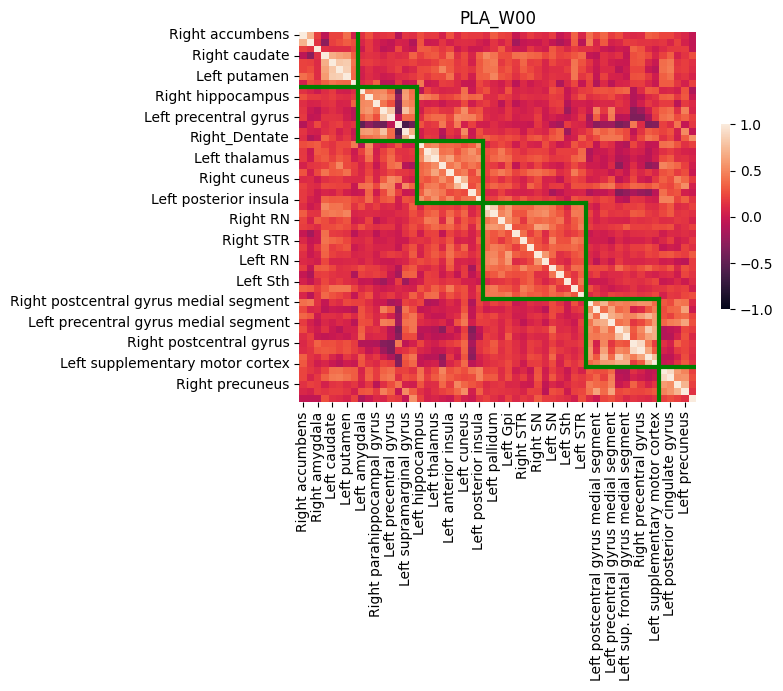

6 found
ROI for community 0 are : Index(['Right accumbens', 'Left accumbens'], dtype='object')
ROI for community 1 are : Index(['Left amygdala', 'Right hippocampus', 'Right parahippocampal gyrus',
       'Right postcentral gyrus', 'Left postcentral gyrus',
       'Right supramarginal gyrus', 'Left supramarginal gyrus',
       'Right_Dentate'],
      dtype='object')
ROI for community 2 are : Index(['Right amygdala', 'Left hippocampus', 'Right thalamus', 'Left thalamus',
       'Left parahippocampal gyrus'],
      dtype='object')
ROI for community 3 are : Index(['Right caudate', 'Left caudate', 'Right pallidum', 'Left pallidum',
       'Right putamen', 'Left putamen', 'Left anterior insula', 'Right RN',
       'Left Gpi', 'Left Gpe', 'Right STR', 'Right Gpi', 'Right SN', 'Left RN',
       'Right Sth', 'Left Sth', 'Right Gpe', 'Left STR'],
      dtype='object')
ROI for community 4 are : Index(['Right anterior insula', 'Right cuneus', 'Left cuneus',
       'Right postcentral gyrus medial s

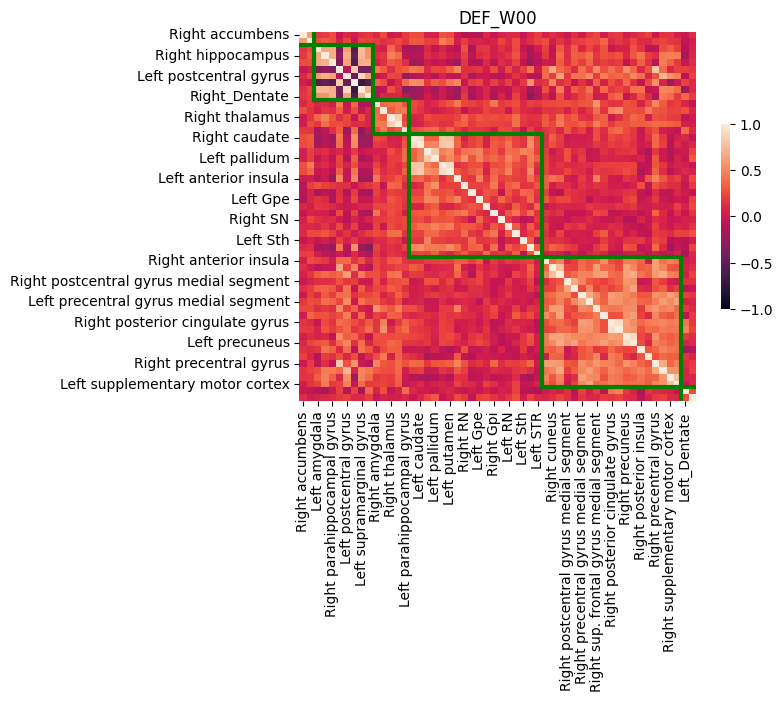

5 found
ROI for community 0 are : Index(['Right accumbens', 'Left accumbens', 'Right caudate', 'Left caudate',
       'Right putamen', 'Left putamen', 'Left thalamus'],
      dtype='object')
ROI for community 1 are : Index(['Left amygdala', 'Right hippocampus', 'Right thalamus',
       'Right anterior insula', 'Right parahippocampal gyrus',
       'Right posterior insula', 'Right postcentral gyrus',
       'Right supramarginal gyrus', 'Right_Dentate'],
      dtype='object')
ROI for community 2 are : Index(['Right amygdala', 'Left hippocampus', 'Left parahippocampal gyrus',
       'Left posterior insula', 'Left RN', 'Left STR'],
      dtype='object')
ROI for community 3 are : Index(['Right pallidum', 'Left pallidum', 'Left_Dentate', 'Right RN',
       'Left Gpi', 'Left Gpe', 'Right STR', 'Right Gpi', 'Right SN', 'Left SN',
       'Right Sth', 'Left Sth', 'Right Gpe'],
      dtype='object')
ROI for community 4 are : Index(['Left anterior insula', 'Right cuneus', 'Left cuneus',
       'Ri

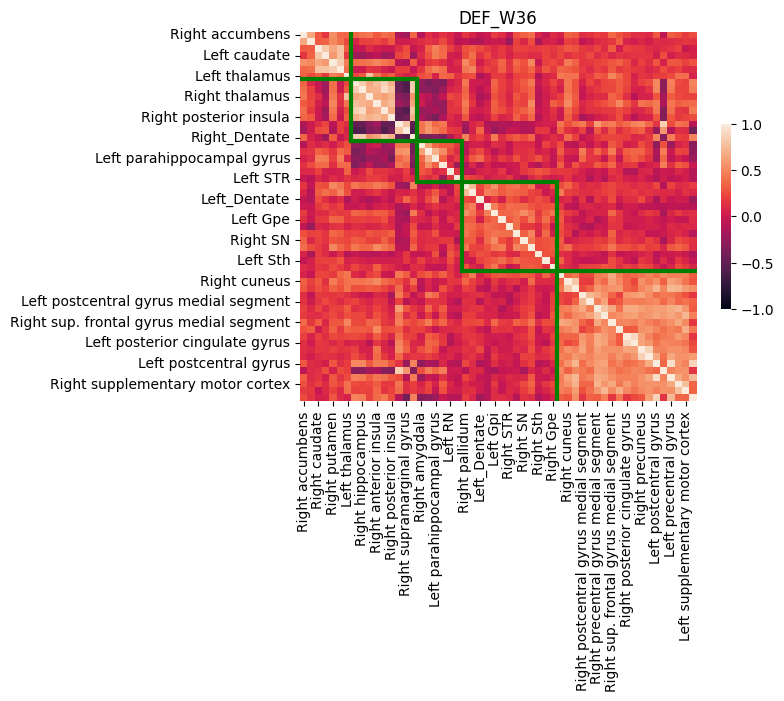

5 found
ROI for community 0 are : Index(['Right accumbens', 'Left accumbens', 'Right caudate', 'Left caudate',
       'Right putamen', 'Left putamen'],
      dtype='object')
ROI for community 1 are : Index(['Left amygdala', 'Right hippocampus', 'Left thalamus',
       'Left anterior insula', 'Right cuneus', 'Left cuneus',
       'Left postcentral gyrus medial segment',
       'Left precentral gyrus medial segment',
       'Left sup. frontal gyrus medial segment',
       'Left posterior cingulate gyrus', 'Left precuneus',
       'Right parahippocampal gyrus', 'Right posterior insula',
       'Left posterior insula', 'Left postcentral gyrus',
       'Left precentral gyrus', 'Left supplementary motor cortex',
       'Left supramarginal gyrus'],
      dtype='object')
ROI for community 2 are : Index(['Right amygdala', 'Left hippocampus', 'Right anterior insula',
       'Right postcentral gyrus medial segment',
       'Right precentral gyrus medial segment',
       'Right sup. frontal gyrus 

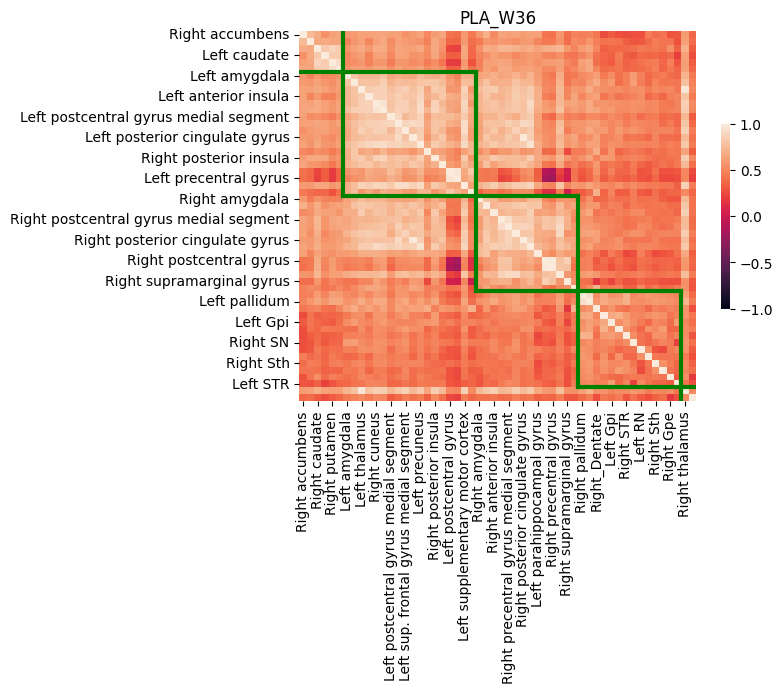

In [79]:
col2keep=df_roi['RoroChoice']==1
__=compare_matrix(PLA_W36.loc[:,col2keep],DEF_W36.loc[:,col2keep],"PLA_W36","DEF_W36",10000,col2keep.index,os.path.join(STUDY_PATH,"screenshots"))
__=compare_matrix(DEF_W00.loc[:,col2keep],DEF_W36.loc[:,col2keep],"DEF_W00","DEF_W36",10000,FULL_FULL.columns[2:180],os.path.join(STUDY_PATH,"screenshots"))
__=compare_matrix(PLA_W00.loc[:,col2keep],PLA_W36.loc[:,col2keep],"PLA_W00","PLA_W36",10000,FULL_FULL.columns[2:180],os.path.join(STUDY_PATH,"screenshots"))
__=compare_matrix(PLA_W00.loc[:,col2keep],DEF_W00.loc[:,col2keep],"PLA_W00","DEF_W00",10000,FULL_FULL.columns[2:180],os.path.join(STUDY_PATH,"screenshots"))

Euclidean distance between PLA_W36 and DEF_W36 is 3.269
Sur 10000 seulement 4863 ont une distance superieure,les deux matrices sont donc significativement différentes à p=0.4863
Indices des 5% de nodes ayant valeurs les plus hautes : [38  3] et Index(['Right anterior orbital gyrus', 'Left accumbens'], dtype='object', name='Name_inFP2')
Euclidean distance between DEF_W00 and DEF_W36 is 2.363
Sur 10000 seulement 5117 ont une distance superieure,les deux matrices sont donc significativement différentes à p=0.5117
Indices des 5% de nodes ayant valeurs les plus hautes : [41 38] et Index(['Left angular gyrus', 'Right anterior orbital gyrus'], dtype='object')
Euclidean distance between PLA_W00 and PLA_W36 is 3.216
Sur 10000 seulement 4682 ont une distance superieure,les deux matrices sont donc significativement différentes à p=0.4682
Indices des 5% de nodes ayant valeurs les plus hautes : [17 26] et Index(['Right inf. lateral ventricle', 'Left thalamus'], dtype='object')
Euclidean distance be

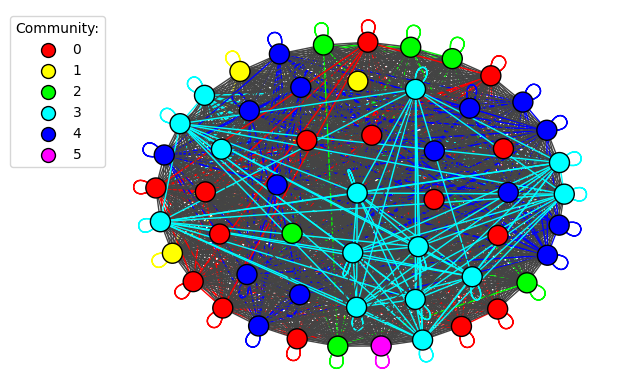

' \n# Calcul de la distance moyenne entre les nœuds\naverage_distance = nx.average_shortest_path_length(G)\nprint("Distance moyenne entre les nœuds :", average_distance)\n\n# Calcul du coefficient de regroupement\nclustering_coefficient = nx.average_clustering(G)\nprint("Coefficient de regroupement :", clustering_coefficient)\n '

In [105]:
import networkx as nx

# Charger la matrice de corrélation à partir d'un fichier ou d'une variable
#matrice_correlation = np.absolute()
# Convertir la matrice de corrélation en un graphique à l'aide de igraph
mat=PLA_W36.loc[:,col2keep].corr()

matrice_correlation = np.absolute(mat)
    # Convertir la matrice de corrélation en un graphique à l'aide de igraph
G = ig.Graph.Weighted_Adjacency(matrice_correlation, mode="upper")
#G = ig.Graph.Weighted_Adjacency(mat[(mat<-0.6)|(mat>0.6)], mode="upper")

#communities = G.community_edge_betweenness()
#communities = communities.as_clustering()

# Effectuer la détection de communautés à l'aide de l'algorithme de Louvain
communities = G.community_multilevel(weights=G.es["weight"])

# Extraire les étiquettes de communauté pour chaque nœud
node_labels1 = communities.membership
num_communities = len(set(node_labels1))

#num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    G.vs[community]["color"] = i
    community_edges = G.es.select(_within=community)
    community_edges["color"] = i

fig, ax = plt.subplots()
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=20,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()

# #G.shortest_paths()
# val=ig.Graph.distances(G)
# print(G.summary(verbosity=1))

""" 
# Calcul de la distance moyenne entre les nœuds
average_distance = nx.average_shortest_path_length(G)
print("Distance moyenne entre les nœuds :", average_distance)

# Calcul du coefficient de regroupement
clustering_coefficient = nx.average_clustering(G)
print("Coefficient de regroupement :", clustering_coefficient)
 """

In [87]:
G = nx.watts_strogatz_graph(n=100, k=10, p=0.1)
G

In [88]:
G = ig.Graph.Weighted_Adjacency(PLA_W36.loc[:,col2keep].corr(), mode="upper")
G

In [84]:
import networkx as nx

# Création d'un graphe de petits mondes
G = nx.watts_strogatz_graph(n=100, k=10, p=0.1)

# Calcul de la distance moyenne entre les nœuds
average_distance = nx.average_shortest_path_length(G)
print("Distance moyenne entre les nœuds :", average_distance)

# Calcul du coefficient de regroupement
clustering_coefficient = nx.average_clustering(G)
print("Coefficient de regroupement :", clustering_coefficient)


Distance moyenne entre les nœuds : 2.651919191919192
Coefficient de regroupement : 0.4980717615717616


Euclidean distance between PLA_W00 and DEF_W00 is 6.658
Sur 10 seulement 7 ont une distance superieure,les deux matrices sont donc significativement différentes à p=0.7
Indices des 5% de nodes ayant valeurs les plus hautes : [145 142  10 139 148 118  40 151 136 506 141 150 457 507   9 119 144 147
  12  11  41 456 138 532 153  54] et Index(['Vermis_CrusII', 'Vermis_CrusI', 'Left caudate', 'Vermis_VI',
       'Vermis_VIIb', 'Right supplementary motor cortex',
       'Right anterior orbital gyrus', 'Vermis_VIIIa', 'Left_V', 'R_PFop',
       'Left_CrusI', 'Left_VIIIa', 'R_s6-8', 'R_PF', 'Right caudate',
       'Left supplementary motor cortex', 'Left_CrusII', 'Left_VIIb',
       'Left cerebellum exterior', 'Right cerebellum exterior',
       'Left anterior orbital gyrus', 'R_i6-8', 'Left_VI', 'R_MBelt',
       'Left_VIIIb', 'Right frontal pole'],
      dtype='object')
538 nodes, 144453 connexions, 16044 significantly different for p_fdr < 0.05
et 479 avec des correlations >0.6 dans une des

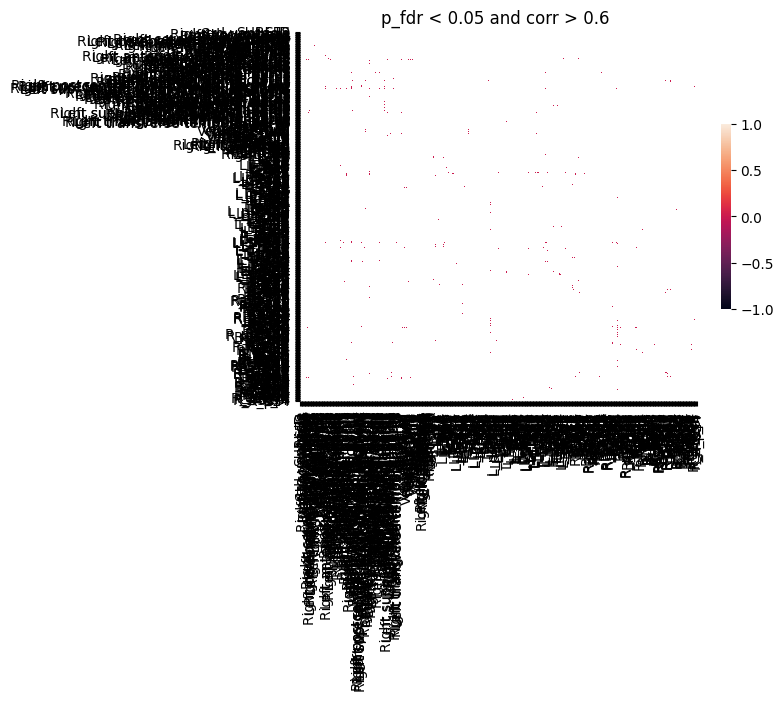

la correlation entre Left caudate et Left middle frontal gyrus est de 25.932 pour PLA_W00 et 25.532 pour DEF_W00  (p_value = 0.000)
la correlation entre Left caudate et Left parietal operculum est de 26.239 pour PLA_W00 et 24.723 pour DEF_W00  (p_value = 0.000)
la correlation entre Left caudate et Left temporal pole est de 25.234 pour PLA_W00 et 24.703 pour DEF_W00  (p_value = 0.000)
la correlation entre Left caudate et R_EC est de 25.110 pour PLA_W00 et 24.064 pour DEF_W00  (p_value = 0.000)
la correlation entre Left cerebellum exterior et Left_CrusI est de 24.729 pour PLA_W00 et 25.279 pour DEF_W00  (p_value = 0.000)
la correlation entre Left inf. lateral ventricle et Right inf. lateral ventricle est de 18.760 pour PLA_W00 et 18.991 pour DEF_W00  (p_value = 0.000)
la correlation entre Left basal forebrain et Left basal forebrain est de 23.111 pour PLA_W00 et 24.115 pour DEF_W00  (p_value = 0.000)
la correlation entre Right basal forebrain et Left central operculum est de 23.607 pour 

IndexError: index 70 is out of bounds for axis 0 with size 69

In [41]:
#compare_matrix(PLA_W00,DEF_W00,"PLA_W00","DEF_W00",100,FULL_FULL.columns,os.path.join(STUDY_PATH,"screenshots"))

matrice1=PLA_W00
matrice2=DEF_W00
name1="PLA_W00"
name2="DEF_W00"
nb_perm=10
columns=FULL_FULL.columns
community_pathname=os.path.join(STUDY_PATH,"screenshots")

# Calculer la distance entre les deux matrices à l'aide de la fonction cdist()
distance_ref = cdist(matrice1.corr(), matrice2.corr(), metric='euclidean')
#np.fill_diagonal(distance_ref, 0)

# Afficher la matrice de distances
print(f"Euclidean distance between {name1} and {name2} is {np.mean(distance_ref):.3f}")
dist_list4nodes=[]
dist_list4edges=[]

for cpt in range(nb_perm):
    df_perm=pd.concat([matrice1,matrice2],axis=0).sample(frac=1)
    #permutations = np.random.permutation(df_perm.shape[0])
    #tableau_2d_permuted = df_perm[permutations, :]
    #=tableau_2d_permuted[:matrice1.shape[0]]
    #matrice2_tmp=tableau_2d_permuted[matrice1.shape[0]:]
    distance = cdist(df_perm.iloc[:matrice1.shape[0],:].corr(), df_perm.iloc[matrice1.shape[0]:,:].corr(), metric='euclidean')

    # Afficher la matrice de distances
    dist_list4nodes.append(np.mean(distance))
    dist_list4edges.append(distance)

#nodes
nb_sup=np.sum(np.array(dist_list4nodes)>=np.mean(distance_ref))
print(f"Sur {nb_perm} seulement {nb_sup} ont une distance superieure,les deux matrices sont donc significativement différentes à p={nb_sup/nb_perm}")
n = int(len(np.mean(distance_ref,axis=0)) * 0.05)
indices = np.argpartition(np.mean(distance_ref,axis=0), -n)[-n:]
indices = indices[np.argsort(np.mean(distance_ref,axis=0)[indices])[::-1]]
print(f"Indices des 5% de nodes ayant valeurs les plus hautes : {indices} et {columns[indices]}")

#edges
nb_nodes=len(np.mean(distance_ref,axis=0)) 
nb_edges = int((nb_nodes * nb_nodes - nb_nodes) /2)
dist_sum=np.sum((np.array(dist_list4edges)<distance_ref),axis=0)
dist_sum=dist_sum/nb_perm

b_fdr,ps_fdr=sm.stats.fdrcorrection(1-dist_sum.ravel(),alpha=0.05,method='indep',is_sorted=False)  
print(f"{nb_nodes} nodes, {nb_edges} connexions, {np.sum(b_fdr)} significantly different for p_fdr < 0.05")
mask=((np.abs(matrice1.corr()) > 0.6) | (np.abs(matrice2.corr()) > 0.6)) & (b_fdr.reshape(matrice1.corr().shape[0],matrice1.corr().shape[0]))
highest_indices = np.argwhere(mask)
nb_edges_signdiff=len(highest_indices)
print(f"et {nb_edges_signdiff} avec des correlations >0.6 dans une des deux matrices")

df_tmp = pd.DataFrame(data=dist_sum, columns=matrice1.columns, index=matrice1.columns)
#np.fill_diagonal(matriceG1, 0)
#displayed_mat = np.triu(displayed_mat,1)
plt.figure()
sns.heatmap(1-df_tmp.where(mask),xticklabels=columns,yticklabels=columns,vmin=-1, vmax=1,cbar_kws={'shrink': 0.5})
plt.title(f"p_fdr < 0.05 and corr > 0.6 ")
plt.savefig(os.path.join(community_pathname,f"{name1}_{name2}.png"), bbox_inches='tight', pad_inches=0.1)
plt.show()
for couple in highest_indices:
    print(f"la correlation entre {columns[couple[0]]} et {columns[couple[1]]} est de {matrice1.iloc[couple[0],couple[1]]:.3f} pour {name1} et {matrice2.iloc[couple[0],couple[1]]:.3f} pour {name2}  (p_value = {1-dist_sum[couple[0],couple[1]]:.3f})")

In [407]:
#set_DEF=set(df_val[df_val['GROUP']=='DEF'].index)
df_cort = pd.DataFrame(resultats[:,1:], index=list(set_DEF), columns=glasser360_aires_list)

tmp=medianeR2_lat_sscort[medianeR2_lat_sscort.index.isin(set_DEF)]
df_ss_cort=tmp[tmp['SES']=='W36'].drop(columns=['SES','EXT_VOL','EXT_CER'])

test=pd.concat([df_cort*1000,(1/df_ss_cort[df_ss_cort.columns].astype(float))*1000],axis=1)
test

['HJKLMJHK',
 'L_V1',
 'L_MST',
 'L_V6',
 'L_V2',
 'L_V3',
 'L_V4',
 'L_V8',
 'L_4',
 'L_3b',
 'L_FEF',
 'L_PEF',
 'L_55b',
 'L_V3A',
 'L_RSC',
 'L_POS2',
 'L_V7',
 'L_IPS1',
 'L_FFC',
 'L_V3B',
 'L_LO1',
 'L_LO2',
 'L_PIT',
 'L_MT',
 'L_A1',
 'L_PSL',
 'L_SFL',
 'L_PCV',
 'L_STV',
 'L_7Pm',
 'L_7m',
 'L_POS1',
 'L_23d',
 'L_v23ab',
 'L_d23ab',
 'L_31pv',
 'L_5m',
 'L_5mv',
 'L_23c',
 'L_5L',
 'L_24dd',
 'L_24dv',
 'L_7AL',
 'L_SCEF',
 'L_6ma',
 'L_7Am',
 'L_7PL',
 'L_7PC',
 'L_LIPv',
 'L_VIP',
 'L_MIP',
 'L_1',
 'L_2',
 'L_3a',
 'L_6d',
 'L_6mp',
 'L_6v',
 'L_p24pr',
 'L_33pr',
 'L_a24pr',
 'L_p32pr',
 'L_a24',
 'L_d32',
 'L_8BM',
 'L_p32',
 'L_10r',
 'L_47m',
 'L_8Av',
 'L_8Ad',
 'L_9m',
 'L_8BL',
 'L_9p',
 'L_10d',
 'L_8C',
 'L_44',
 'L_45',
 'L_47l',
 'L_a47r',
 'L_6r',
 'L_IFJa',
 'L_IFJp',
 'L_IFSp',
 'L_IFSa',
 'L_p9-46v',
 'L_46',
 'L_a9-46v',
 'L_9-46d',
 'L_9a',
 'L_10v',
 'L_a10p',
 'L_10pp',
 'L_11l',
 'L_13l',
 'L_OFC',
 'L_47s',
 'L_LIPd',
 'L_6a',
 'L_i6-8',
 'L_s6-8',
 

In [136]:
from importlib import reload
import laBIBILaRORO as lbr
reload(lbr)
#DEF et PLA à W00
val_R2=np.concatenate([np.array(valR2_W36_PLA),np.array(valR2_W36_DEF)],axis=0)
ssdf_CT = pd.DataFrame(val_R2)
ssdf_CT.index = df_val.index

lbr.grp_comp_surface_func("GROUP",[],df_val,ssdf_CT,os.path.join(STUDY_PATH,"screenshots"),threshold_p=0.09,threshold_size=10)

La bibil à RORO loaded
